# 1 Business Problem Understanding

**Context**

> A marketing campaign is a set of commercial operations all pursuing the same objective, which may concern the improvement of brand awareness and/or sales objectives. If in the past the majority of commercial operations were based on mass marketing, nowadays direct or even targeted marketing is more and more desired. Companies use direct marketing strategies when they target customer segments by contacting them to achieve a specific sales campaign. 
[Source 1](https://www.mdpi.com/1911-8074/15/6/269)


> Direct marketing ultimately aims to establish cost-effective, two-way and one-to-one communications with individual customers, which is not restricted to the internet; most direct marketing communication is still performed via traditional channels, such as direct mail, sms, email and inbound and outbound calls. To achieve efficient direct marketing, possessing information about the present and estimating future customer preferences is a fundamental requirement. In the current business climate, customer preferences change dynamically, and they are too complicated to derive direct conclusions. <br>

>   Direct marketing campaigns are essential instruments for enhancing the economic gain of a firm in two respects: obtaining new customers and creating additional yield from present customers. [Source 2](https://www.researchgate.net/publication/283761844_IBMMS_Decision_Support_Tool_for_Management_of_Bank_Telemarketing_Campaign)


> In this dataset we have data that describing Portugal bank marketing campaigns results. Conducted campaigns were based mostly on direct phone calls, offering bank client to place a term deposit.
If after all marketing efforts client had agreed to place deposit - target variable marked 'yes', otherwise 'no'.

**Problem Statement**

> As said before, eventhough this direct marketing aims to establish cost effective however if we call all of our customer without knowing either they will place the deposit or not it's not effective at all. Also, this kind of marketing could also make some customer feel uncomfortable. So, it is important to make the campaign cost as low as possible and prevent from customers complaint.

**Objective**

> According to the problem, we have to know what kind of customer that will subscribe a term of deposit and to train the best machine learning model that is able to predict the minimum cost of this bank's telemarketing campaign.

**Variable**

*   Available Features <br>
'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays' 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'

*   Target <br>
'y'

**Analytic Approach**

> The first thing we have to do is to analyze our data to find pattern that classified which customer that want to place the deposit or not. After that, we have to build machine learning model that is able to predict the minimum cost of this bank's telemarketing campaign.

**Metric Evaluation**

*Target*

*   Positive class: 'yes' for subscribe deposit
*   Negative class: 'no' for not subscribe deposit

*Confusion Matrix Term*


*   True Positive (TP): customer who are predicted subscribe and actually subscribe
*   True Negative (TN): customer who are predicted not subscribe and actually not subscribe
*   False Positive (FP): customer who are predicted subscribe and actually not subscribe
*   False Negative (FN): customer who are predicted not subscribe and actually subscribe


**Consequence**

*   False Positive: The bank will lost money because we contact the wrong customer, we can assume it will cost 500 EUR for the operational cost.
*   False Negative: The customer will place the deposit if the bank call them, but the bank doesn't do anything. So, there will be revenue lost, that we can assume around 2000 EUR.


> Based on consequences, we should train the best model to reduce the error cost (the cost from calling the wrong customers), so we should reduce the number of false negative because the cost from false negative is greater than false positive. We use F-beta score (beta=2) metric because this data is imbalance and we don't want to make a very big gap value in False Negatif and False Positif but we want to put more attention on minimizing false negatives than minimizing false positives.
















# 2 Data Understanding

Data Source: [here](https://www.kaggle.com/datasets/volodymyrgavrysh/bank-marketing-campaigns-dataset?select=bank-additional-full.csv)

Note:

*   Imbalance data set
*   Most of data type are numbers and text




### Attribute Information

| Attribute | Data Type, Length | Description |
| --- | --- | --- |
| Age | Integer | 	Age of customers |
| Job| Text | Type of customer's job |
| Marital | Text | Customer's marital status |
| Education | Text | Customer's education level|
| Default | Text | Do the customer credit card default or not? |
| Housing | Text | Do the customer have housing loan? |
| Loan | Text | Do the customer have personal loan?  |
| Contact | Text | Contact communication type |
| Month | Text | Last contact month of year |
| Day of week  | Text | Last contact day of the week |
| Duration | Integer | Last contact duration |
| Campaign | Integer | Number of contacts performed during this campaign and for this client |
| Pdays | Integer | Number of days that passed by after the client was last contacted from a previous campaign |
| Previous | Integer | Number of contacts performed before this campaign and for this client |
| Poutcome | Text | Outcome of the previous marketing campaign |
| Emp.var.rate | Float | Employment variation rate - quarterly indicator |
| Cons.price.idx | Float | Costomer price index - monthly indicator |
| Cons.conf.idx | Float | Customer confidence index - monthly indicator |
| Euribor3m | Float | Euribor 3 month rate - daily indicator |
| Nr.employed | Float | Number of employees - quarterly indicator  |
| Y | Text | Has the client subscribed a term deposit?  |

**Glossary**

**The employment rate** is the percentage of potentially employed people who have jobs. It's usually measured over a certain period of time for a certain geographic area, like a city, state or country. The employment rate can give information about the economy, so public agencies might include it in their news releases, and the media may track the employment to demonstrate economic health. [1](https://www.indeed.com/career-advice/career-development/employment-rate-formula)

**Consumer price index** reflects changes in the cost to the average consumer of acquiring a basket of goods and services that may be fixed or changed at specified intervals, such as yearly. A commonly used measure of inflation is the consumer price index, which measures the prices of a representative basket of goods and services purchased by a typical household. The consumer price index is usually calculated on the basis of periodic surveys of consumer prices. [2](https://databank.worldbank.org/metadataglossary/world-development-indicators/series/FP.CPI.TOTL#:~:text=A%20commonly%20used%20measure%20of,periodic%20surveys%20of%20consumer%20prices.)

**The Consumer Confidence Index (CCI)** is a survey, that measures how optimistic or pessimistic consumers are regarding their expected financial situation. The CCI is based on the premise that if consumers are optimistic, they will spend more and stimulate the economy but if they are pessimistic then their spending patterns could lead to an economic slowdown or recession. [3](https://www.investopedia.com/terms/c/cci.asp)

**The 3 month Euribor interest rate** is the interest rate at which a selection of European banks lend one another funds denominated in euros whereby the loans have a maturity of 3 months. The Euribor interest rates are the most important European interbank interest rates. When the Euribor interest rates rise or fall (substantially) there is a high likelihood that the interest rates on banking products such as mortgages, savings accounts and loans will also be adjusted. [4](https://www.global-rates.com/en/interest-rates/euribor/euribor-interest-3-months.aspx#:~:text=The%203%20month%20Euribor%20interest,a%20maturity%20of%203%20months.)

# 3 Initial Preparation

**Library**

In [50]:
!pip install category_encoders

In [51]:
!pip install shap

In [52]:
# Library

import pandas as pd
import numpy as np
# larger cell code
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html
from itertools import chain,cycle

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce

# Model Selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier 


# Imbalance Dataset
from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Set max columns
pd.set_option('display.max_columns', None)

# metrics
from sklearn.metrics import f1_score, fbeta_score, classification_report, recall_score, precision_score, accuracy_score, confusion_matrix

# math & statistic function
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import chi2_contingency

# library yang dibutuhkan model selection
from sklearn.model_selection import GridSearchCV,train_test_split, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import cross_val_score, KFold

# feature importance
import shap

# pickle for deployment
import pickle

**Function**

In [53]:
# check each feature categorical or numerical
def col_info(df, i, figsize = (5, 3)):
    print(f"index kolom : {i}")
    print(f"nama kolom : {df.columns[i]}")
    print("\nUnique item pada kolom")
    print(f"{df[df.columns[i]].unique()}")
    print("\nValue Counts")
    df_col_info = pd.DataFrame(df[df.columns[i]].value_counts())
    df_col_info.rename(columns = {f"{df.columns[i]}" : f"n_{df.columns[i]}"}, inplace = True)
    
    plt.figure(figsize = figsize)
    sns.countplot(data = df, x = df[df.columns[i]],order=df[df.columns[i]].value_counts().index, palette = "mako")
    plt.xticks(rotation = 45)
    plt.show()
    
    return df_col_info

In [54]:
# check feature if too much numerical. 
# then check for distribution and outliers 
def visualize_distribution(df, i) :
    print(f"Stats for {df.columns[i]}:")
    display(df[df.columns[i]].describe())
    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (12,8), 
                                   gridspec_kw={"height_ratios": (.15, .85),
                                               "hspace": 0.05})
    ax1.set_title(f"Distribution of {[df.columns[i]]}", color = "gray")
    sns.boxplot(df[df.columns[i]], ax = ax1)
    ax1.axvline(df[df.columns[i]].mean(), color='r', linestyle='--')
    ax1.axvline(df[df.columns[i]].median(), color='g', linestyle='-')
    ax1.set(xlabel = "")
    sns.distplot(df[df.columns[i]], ax = ax2)
    ax2.axvline(df[df.columns[i]].mean(), color='r', linestyle='--')
    ax2.axvline(df[df.columns[i]].median(), color='g', linestyle='-')
    plt.show()

    pvalue=shapiro(df[df.columns[i]])[1]
    print(f"pvalue of {df.columns[i]} column:",pvalue)
    if pvalue>0.05:
        print("It can be assumed that data are normally distributed")
    else:
        print("It can be assumed that data are NOT normally distributed")

In [55]:
# check each feature categorical or numerical
def col_info_horizontal (df, i, figsize = (5, 3)):
    print(f"index kolom : {i}")
    print(f"nama kolom : {df.columns[i]}")
    print("\nUnique item pada kolom")
    print(f"{df[df.columns[i]].unique()}")
    print("\nValue Counts")
    col_info_horizontal = pd.DataFrame(df[df.columns[i]].value_counts())
    col_info_horizontal.rename(columns = {f"{df.columns[i]}" : f"n_{df.columns[i]}"}, inplace = True)
    
    plt.figure(figsize = figsize)
    sns.countplot(data = df, y = df[df.columns[i]], order=df[df.columns[i]].value_counts().index, palette = 'mako')
    plt.xticks(rotation = 45)
    plt.show()
    
    return col_info_horizontal

In [56]:
# categorical features and target
def target_n_dependant_categorical(df, feature_list , target, n_col = 2, n_rows = 5, figsize = (22,10)):
    print("Categorical Feature vs Target in Absolute Frequency")
    fig, axes = plt.subplots(n_rows, n_col)
    fig.set_size_inches(figsize)
    for ax, v in zip(axes.flatten(), feature_list):
        if v=="month_num":
            pd.crosstab(df[v], df[target]).plot(kind = "line",ax = ax,color=["orange","royalblue"]) 
        else:
            pd.crosstab(df[v], df[target]).plot(kind = "bar",ax = ax,color=["orange","royalblue"])
        ax.set_title(f"n_Cust - {target} by {v}", size = 14)
        ax.set_ylabel("n_Customer")
        ax.set_xlabel('')
        ax.legend(['not subscribe', 'subscribe'])
    plt.tight_layout()
    plt.show()

In [57]:
# categorical features and target in proprortion
def target_n_dependant_categorical_proportion(df, feature_list ,target,n_col=2,n_rows=5,figsize = (22,10)):
    fig, axes = plt.subplots(n_rows, n_col)
    fig.set_size_inches(figsize)
    for ax, v in zip(axes.flatten(), feature_list):
        pd.crosstab(df[v], df[target],normalize=True).plot(kind="bar",stacked=True,color=["orange","royalblue"],ax=ax)
        ax.set_title(f'Cust.Prop - {target} by {v}',size = 14)
        ax.set_ylabel('Customer Proportion')
        ax.set_xlabel('')
        ax.legend(['not subscribe', 'subscribe'])
    plt.tight_layout()
    plt.show()

In [58]:
# categorical features and target single in freq and proportion
def target_n_dependant_categorical_single(df, feature, target):
    if feature=="month_num":
        plt.rcParams['figure.figsize'] = [10, 6]
        fig, axes = plt.subplots(1,1,squeeze=False)
        ax=axes.ravel()
        pd.crosstab(df[feature], df[target]).plot(kind = "line",ax=ax[0],color=["orange","royalblue"]) 
    else:
        plt.rcParams['figure.figsize'] = [20, 8]
        fig, ax = plt.subplots(1,2)
        pd.crosstab(df[feature], df[target]).plot(kind = "bar",ax=ax[0],color=["orange","royalblue"])
        pd.crosstab(df[feature], df[target],normalize=True).plot(kind="bar",stacked=True,ax=ax[1],color=["orange","royalblue"])
    for i in range(len(ax)):
        ax[i].set_xlabel('')
        ax[i].legend(["not subscribe", "subscribe"])
        if i == 0:
            ax[i].set_title(f"n_Cust - {target} by {feature}")
            ax[i].set_ylabel("n_Customer")
        else:
            ax[i].set_title(f"proportion - {target} by {feature}")
            ax[i].set_ylabel("Proportion")
    plt.show()

In [59]:
# categorical features and target single in freq and proportion (table)
def target_n_dependant_categorical_proportion_table(df, feature, target):
    ct_df=pd.crosstab(df[feature], df[target].rename("Deposit"))
    ct_df_proportion=pd.crosstab(df[feature], df[target], normalize = True)*100
    ct_df_proportion.rename(columns={"no":"%no (normalize=true)","yes":"%yes (normalize=true)"},inplace=True)
    ct_df_proportion_0=pd.crosstab(df[feature], df[target], normalize = 0)*100
    ct_df_proportion_0.rename(columns={"no":"%no (normalize=0)","yes":"%yes (normalize=0)"},inplace=True)
    ct_df=pd.concat([ct_df,ct_df_proportion],axis=1)

    display(HTML(f"<h4>Subcribtion by {feature.capitalize()}</h4>"))
    display(HTML(ct_df.to_html()))
    display(HTML(ct_df_proportion_0.to_html()))

In [60]:
# Numerical features and target in proprortion
def target_n_dependant_numerical_proportion(df, feature_list , target, n_col = 2, n_rows = 5, figsize = (22,10)):
    fig, axes = plt.subplots(n_rows, n_col)
    fig.set_size_inches(figsize)
    for ax, v in zip(axes.flatten(),feature_list):
        df.loc[df["y"]=="no",v].plot(kind='hist',ax=ax,alpha=0.5,density=True,bins=40,color="orange",label='not subscribe')
        df.loc[df["y"]=="yes",v].plot(kind='hist',ax=ax,alpha=0.5,density=True,bins=40,color="royalblue",label='subscribe')
        ax.set_title(v.capitalize(),size=14)
        ax.set_xlabel('')
        ax.set_ylabel('Customer Proportion')
        ax.legend(['no subscribe','subscribe'])
    plt.tight_layout()
    plt.show()

In [61]:
# Numerical features and target single in proprortion 
def target_n_dependant_numerical_proportion_single(df, feature, target):
    plt.rcParams['figure.figsize'] = [9, 6]
    df.loc[df["y"]=="no",feature].plot(kind='hist',alpha=0.5,density=True,bins=40,color="orange",label='No Deposit')
    df.loc[df["y"]=="yes",feature].plot(kind='hist',alpha=0.5,density=True,bins=40,color="royalblue",label='Deposit')
    plt.title(f"n_Cust - {target} by {feature}", size = 14)
    plt.ylabel("n_Customer")
    plt.xlabel('')
    plt.legend(["not subscribe", "subscribe"])
    plt.axvline(x=df[df["y"]=="no"][feature].median(),color="orange",linestyle='--')
    plt.axvline(x=df[df["y"]=="yes"][feature].median(),color="royalblue",linestyle='--')
    plt.show()

In [62]:
# Numerical features and target in proprortion (table)
def target_n_dependant_numerical_proportion_table(df,list_numerical):
    list_median_deposit=[]
    list_median_no_deposit=[]

    for num_feat in list_numerical:
        median_deposit=df[df["y"]=="yes"][num_feat].median()
        median_no_deposit=df[df["y"]=="no"][num_feat].median()
        list_median_deposit.append(median_deposit)
        list_median_no_deposit.append(median_no_deposit)

    df_median_num=pd.DataFrame(index=list_numerical,data=list_median_no_deposit).rename(columns={0:"median (no deposit)"})
    df_median_num["median (deposit)"]=list_median_deposit
    display(HTML(df_median_num.to_html()))

In [63]:
# subscribe rate
def barplot_mean(x, y, df, hue=None, order=None, hue_order=None):
    if hue==None:
        print(df.groupby(x)[y].mean())
    else:
        df_month_modify.groupby([x,hue])[y].mean()

    plt.figure(figsize=(12,6))        
    sns.barplot(x=x, y=y, data=df, estimator=np.mean, hue=hue, order=order, hue_order=hue_order, ci=None)
    plt.ylabel("subrciption rate")
    plt.show()

In [64]:
def display_side_by_side(*args,titles=cycle([""])):
    html_str = ""
    for df,title in zip(args, chain(titles,cycle(["</br>"])) ):
        html_str += "<th style='text-align:center'><td style = 'vertical-align:top'>"
        html_str += f"<h3>{title}</h3>"
        html_str += df.to_html().replace("table","table style='display:inline'")
        html_str += "</td></th>"
    display_html(html_str,raw=True)

In [65]:
# Change month to num
def month_to_num(x):
    if x == "may":
        return 5
    elif x == "jun":
        return 6
    elif x == "jul":
        return 7
    elif x == "aug":
        return 8
    elif x == "sep":
        return 9
    elif x == "oct":
        return 10
    elif x == "nov":
        return 11
    elif x == "dec":
        return 12
    elif x == "mar":
        return 3
    elif x == "apr":
        return 4

**Load Dataset**

In [66]:
# Loading the dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')
# Brief visualization of the dataset (5 first rows)
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


**Change some columns name**

In [67]:
df = df.rename(columns={'emp.var.rate':'emp_var_rate'})
df = df.rename(columns={'cons.price.idx':'cons_price_idx'})
df = df.rename(columns={'cons.conf.idx':'cons_conf_idx'})
df = df.rename(columns={'nr.employed':'nr_employed'})

In [68]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# 4 Exploratory Data Analysis (EDA)

## 4.1 General Check

In [69]:
# Type of variables, Missing values and total rows information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [70]:
# Variables' names information
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

In [71]:
# Descriptive statistics of numerical features in the dataset
df.describe()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [72]:
# General stats of categoric variables
df.describe(include=['object']) 

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


**Check Missing Value**

In [73]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

There is no missing value, but if we checked the unique value of every columns there are columns that have "unknown" value.

**Check Duplicated Data and Its Treatment**

In [74]:
df.duplicated().sum()

12

In [75]:
df[df.duplicated()]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [76]:
df.drop_duplicates(inplace=True)

There are only 12 duplicates in this dataset, we consider this as insignificant so we will delete them.

In [77]:
df.shape

(41176, 21)

## 4.2 Feature Check

**Age Column**

Stats for age:


count    41176.00000
mean        40.02380
std         10.42068
min         17.00000
25%         32.00000
50%         38.00000
75%         47.00000
max         98.00000
Name: age, dtype: float64

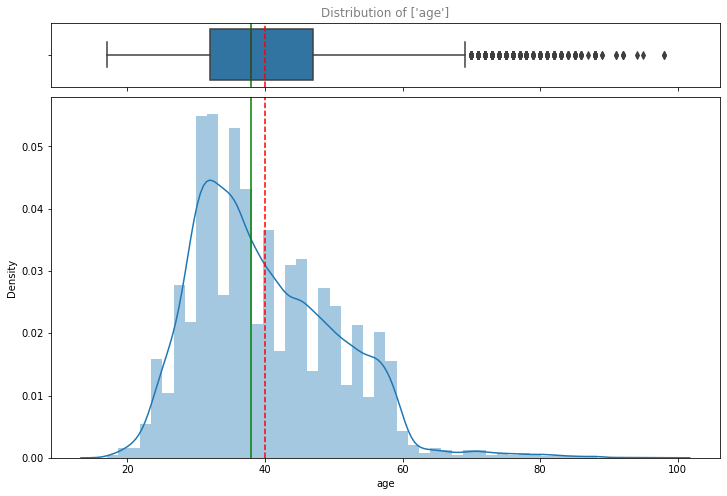

pvalue of age column: 0.0
It can be assumed that data are NOT normally distributed


In [78]:
visualize_distribution(df,0)

- The age feature shows the age of each customer in years
- From this data, it is known that the distribution of customers by age ranges from 20 years to 90 years

**Job Column**

index kolom : 1
nama kolom : job

Unique item pada kolom
['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']

Value Counts


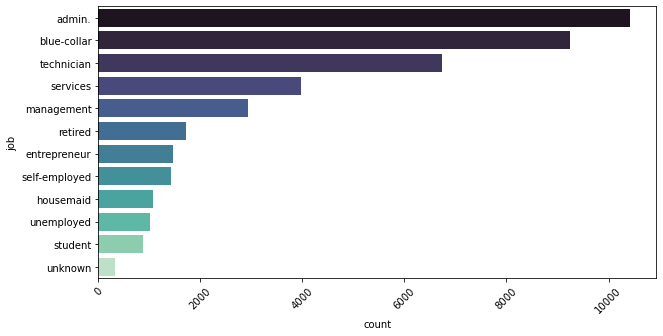

,n_job
admin.,10419
blue-collar,9253
technician,6739
services,3967
management,2924
retired,1718
entrepreneur,1456
self-employed,1421
housemaid,1060
unemployed,1014


In [79]:
col_info_horizontal(df, 1, (10,5))

- Job feature shows the type of job for each customer
- Job feature show anomaly, we consider the 'unknown' category as a missing value and will be treated in the next section
- From this data it is known that the type of work of the customer in the first, second and third order accordingly are admin, blue-collar and technician

**Marital Column**

index kolom : 2
nama kolom : marital

Unique item pada kolom
['married' 'single' 'divorced' 'unknown']

Value Counts


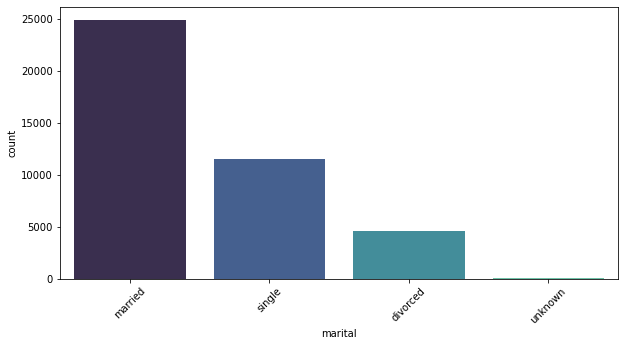

,n_marital
married,24921
single,11564
divorced,4611
unknown,80


In [80]:
col_info(df, 2, (10,5))

- Marital feature shows the marital status of each customer
- The Marital feature shows an anomaly, namely 'unknown' which we consider as missing value
- From this data, it is known that customers are dominated by married people 

**Education Column**

index kolom : 3
nama kolom : education

Unique item pada kolom
['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']

Value Counts


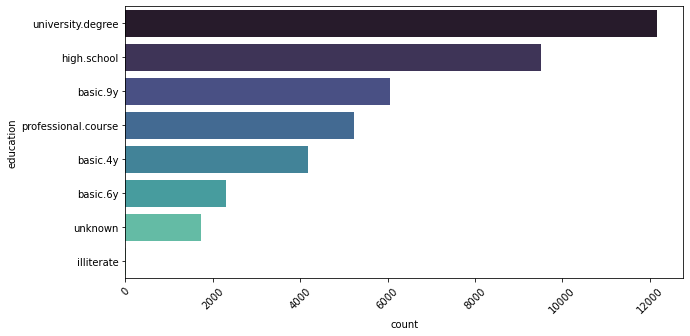

,n_education
university.degree,12164
high.school,9512
basic.9y,6045
professional.course,5240
basic.4y,4176
basic.6y,2291
unknown,1730
illiterate,18


In [81]:
col_info_horizontal(df, 3, (10,5))

- The Education feature shows the level of education of each customer
- Feature Education has an 'unknown' category which we consider a missing value
- From this data, it is known that most of the customers have bachelor and high school degrees

**Default Column**

index kolom : 4
nama kolom : default

Unique item pada kolom
['no' 'unknown' 'yes']

Value Counts


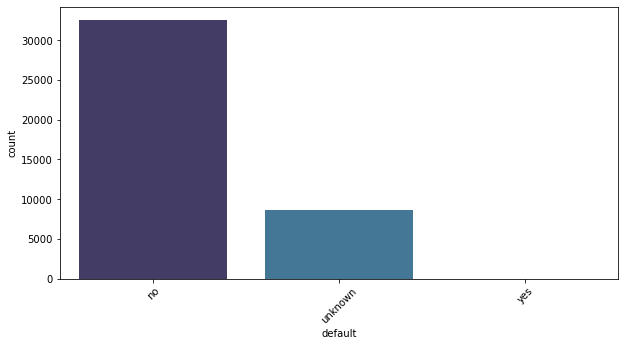

,n_default
no,32577
unknown,8596
yes,3


In [82]:
col_info(df, 4, (10,5))

- The Default feature explains, "does the customer have bad credit in their record?"
- The Default feature shows an anomaly, namely the 'yes' category which only amounts to 3 from the dataset
- From this data, it is known that most of the customers do not have bad credit

**Housing Column**

index kolom : 5
nama kolom : housing

Unique item pada kolom
['no' 'yes' 'unknown']

Value Counts


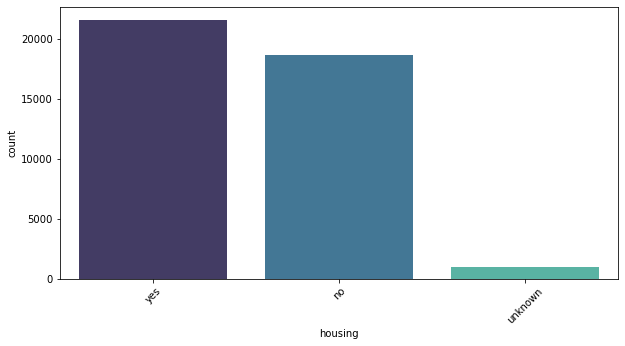

,n_housing
yes,21571
no,18615
unknown,990


In [83]:
col_info(df, 5, (10,5))

- Feature Housing explains, "does the customer have a home loan (kpr)?"
- Housing feature shows an anomaly, namely the 'unknown' category
- From this data it is known that there is only a slight difference for customers who have and do not have mortgages

**Loan Column**

index kolom : 6
nama kolom : loan

Unique item pada kolom
['no' 'yes' 'unknown']

Value Counts


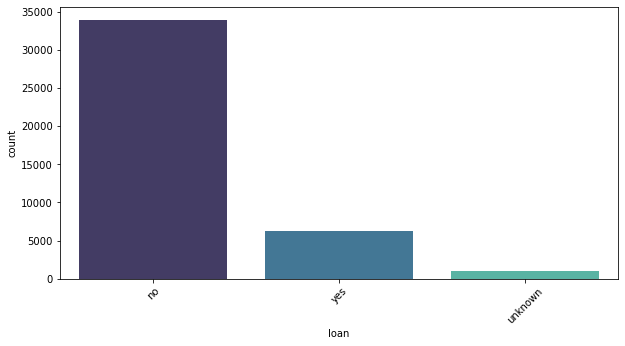

,n_loan
no,33938
yes,6248
unknown,990


In [84]:
col_info(df, 6, (10,5))

- Feature Loan explains, "does the customer have personal credit?"
- Loan feature does not show anomaly
- From this data it is known that the majority of customers (82.42%) do not have personal credit products in any form (eg credit cards, paylaters, etc.)

**Contact Column**

index kolom : 7
nama kolom : contact

Unique item pada kolom
['telephone' 'cellular']

Value Counts


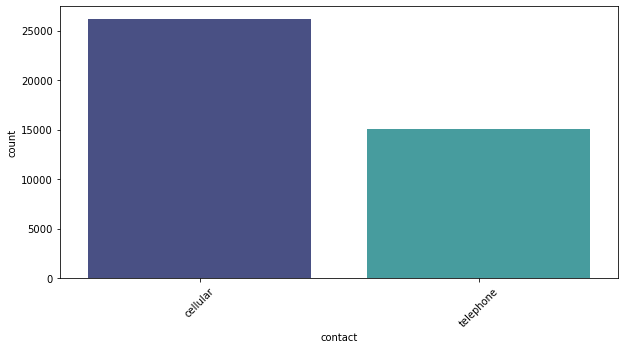

,n_contact
cellular,26135
telephone,15041


In [85]:
col_info(df, 7, (10,5))

- The Contact feature shows the type of way to contact customers, whether by cellular phone or landline.
- Contact feature does not show anomalies
- From this data, it is known that the majority of companies contact customers via cellular phones (63.47%)

**Month Column**

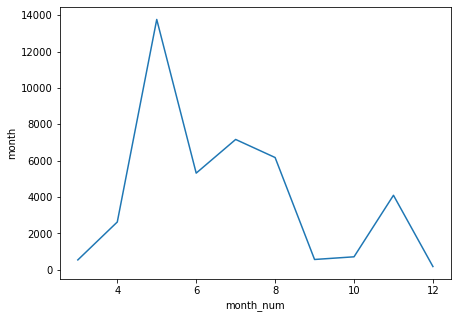

In [86]:
df_month_modify=df.copy()
df_month_modify.insert(9,"month_num",df["month"].apply(month_to_num))
plt.figure(figsize=(7,5))
sns.lineplot(data=df_month_modify.groupby("month_num").count().reset_index(),x="month_num",y="month");

- Feature Month shows in what month was the last time marketing efforts were made by the company to each customer
- Feature Month does not show anomalies
- From this data, it is known that the majority of companies contacted customers last time in May (33.43%) of the total 10 month period of the 'marketing campaign'

**Day of Week Column**

index kolom : 9
nama kolom : day_of_week

Unique item pada kolom
['mon' 'tue' 'wed' 'thu' 'fri']

Value Counts


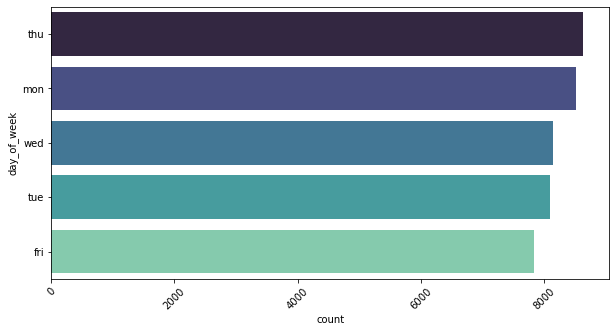

,n_day_of_week
thu,8618
mon,8512
wed,8134
tue,8086
fri,7826


In [87]:
col_info_horizontal(df, 9, (10,5))

- The Day of Week feature shows on what day was the last time marketing efforts were made by the company to each customer
- The Day of Week feature does not show anomalies
- From this data, it is known that there is no significant difference on any given day from a total of five working days, almost evenly distributed by 20% every day

**Campaign Column**

Stats for campaign:


count    41176.000000
mean         2.567879
std          2.770318
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         56.000000
Name: campaign, dtype: float64

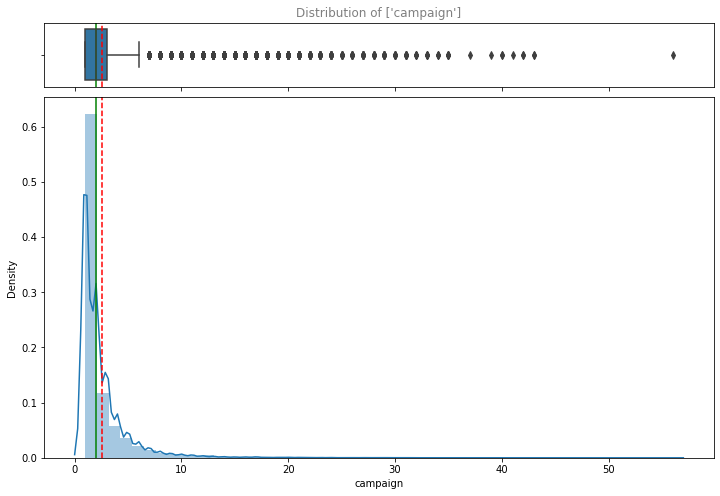

pvalue of campaign column: 0.0
It can be assumed that data are NOT normally distributed


In [88]:
visualize_distribution(df,11)

- Feature Campaign explained, "how many times did the company call the customer for this 'campaign' period?"
- The Campaign feature clearly shows an anomaly, it can be seen in the boxplot above that there are many outliers in this feature
- From this data, it is known that the majority of companies contacted customers 1 to 6 times during this 'campaign' period

**Pdays Column**

Stats for pdays:


count    41176.000000
mean       962.464810
std        186.937102
min          0.000000
25%        999.000000
50%        999.000000
75%        999.000000
max        999.000000
Name: pdays, dtype: float64

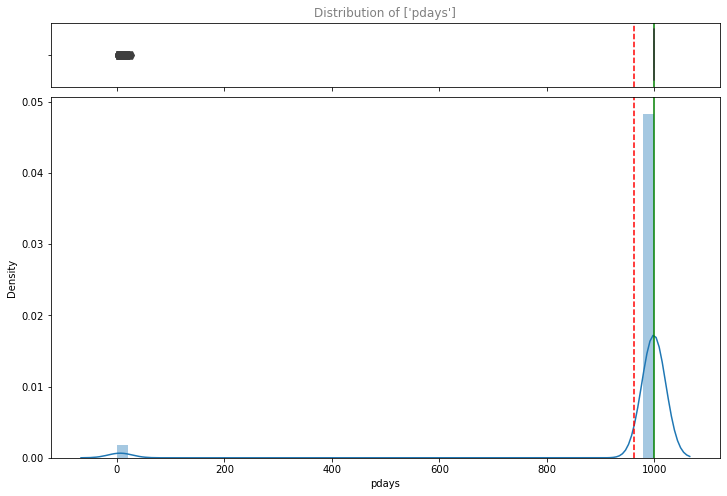

pvalue of pdays column: 0.0
It can be assumed that data are NOT normally distributed


In [89]:
visualize_distribution(df,12)

- Pdays feature explained, "how many days have passed since the company called the customer last time for the 'campaign' period?"
- The Pdays feature clearly shows anomalies, seen in the boxplot and histogram above
- This feature seems unusable because it shows a very extreme 'balance'

**Previous Column**



Stats for previous:


count    41176.000000
mean         0.173013
std          0.494964
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          7.000000
Name: previous, dtype: float64

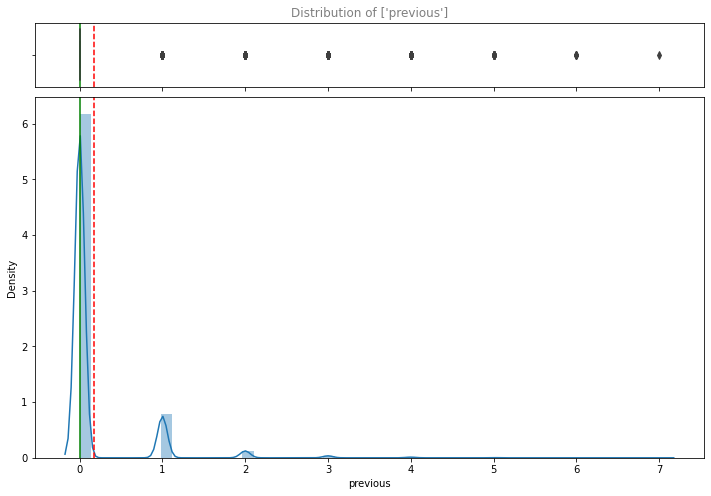

pvalue of previous column: 0.0
It can be assumed that data are NOT normally distributed


In [90]:
visualize_distribution(df,13)

- Previous feature explained, "how many times did the company call customers during the previous campaign 'campaign'?"
- Previous feature shows anomalies
- The majority of customers in this dataset have not been called by customers in the previous 'campaign' period

**Poutcome Column**

index kolom : 14
nama kolom : poutcome

Unique item pada kolom
['nonexistent' 'failure' 'success']

Value Counts


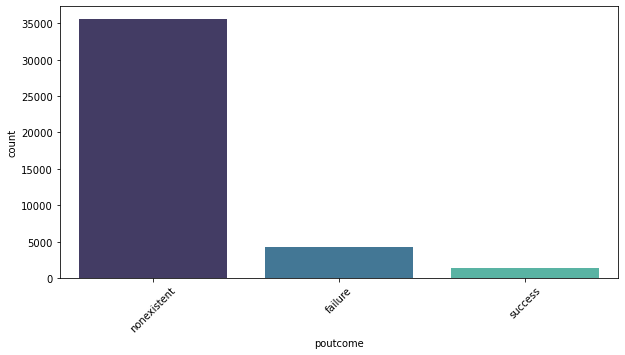

,n_poutcome
nonexistent,35551
failure,4252
success,1373


In [91]:
col_info(df, 14, (10,5))

- Poutcome feature shows the results of the previous 'campaign'
- Poutcome feature does not show anomalies
- The majority of customers fall into the 'nonexistent' category because they have never been contacted by the company in the context of a 'marketing campaign'

**Emp_var_rate Column**

Stats for emp_var_rate:


count    41176.000000
mean         0.081922
std          1.570883
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
max          1.400000
Name: emp_var_rate, dtype: float64

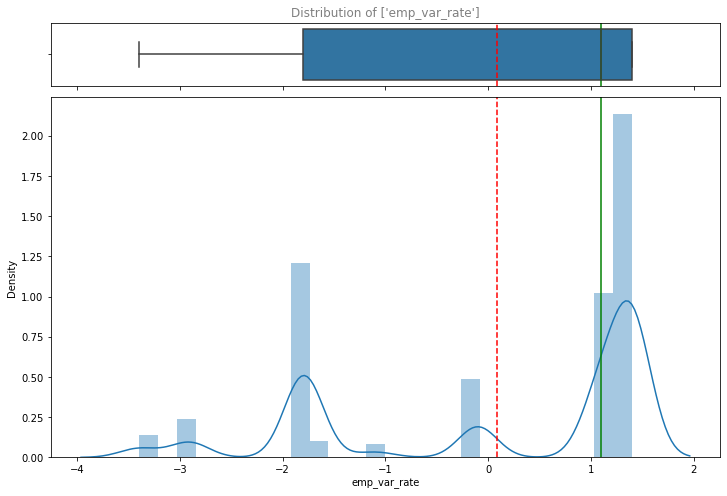

pvalue of emp_var_rate column: 0.0
It can be assumed that data are NOT normally distributed


In [92]:
visualize_distribution(df,15)

- The emp.var.rate feature shows, "Does someone have a tendency to change/lose jobs?"
- The higher the score, the more likely one is to lose a job
- The emp_var_rate feature does not show anomalies

**Cons_price_idx Column**

Stats for cons_price_idx:


count    41176.000000
mean        93.575720
std          0.578839
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
max         94.767000
Name: cons_price_idx, dtype: float64

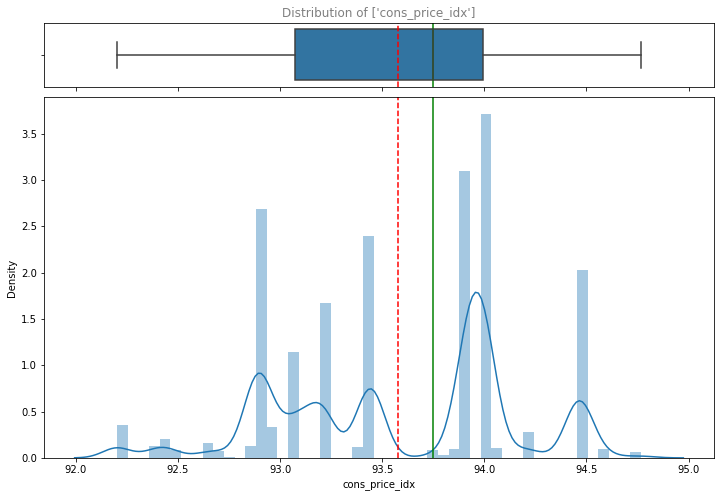

pvalue of cons_price_idx column: 0.0
It can be assumed that data are NOT normally distributed


In [93]:
visualize_distribution(df,16)

- The cons_price_idx feature explains, "how much does the price change for household needs per customer?"
- The cons_price_idx feature does not show anomalies
- This feature shows that the price of household goods for all customers in this dataset has decreased by ~7%

**Cons_conf_idx Column**

Stats for cons_conf_idx:


count    41176.000000
mean       -40.502863
std          4.627860
min        -50.800000
25%        -42.700000
50%        -41.800000
75%        -36.400000
max        -26.900000
Name: cons_conf_idx, dtype: float64

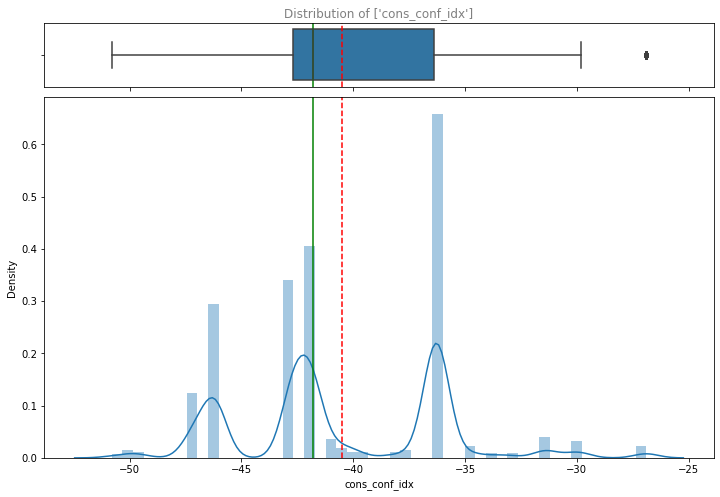

pvalue of cons_conf_idx column: 0.0
It can be assumed that data are NOT normally distributed


In [94]:
visualize_distribution(df,17)

- The cons_conf_index feature explains, "what is the index value of a customer's optimism about their financial situation?"
- The cons_conf_index feature does not show anomalies
- This feature shows that the level of optimism tends to decrease in the range of 30% to 50%

**Euribor3m Column**

Stats for euribor3m:


count    41176.000000
mean         3.621293
std          1.734437
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
max          5.045000
Name: euribor3m, dtype: float64

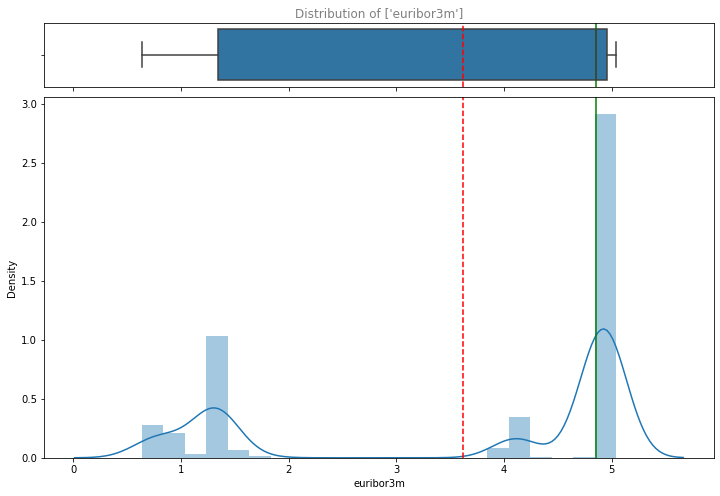

pvalue of euribor3m column: 0.0
It can be assumed that data are NOT normally distributed


In [95]:
visualize_distribution(df,18)

- Feature Euribor3m explains, "how much is the interest rate of an interbank loan in Europe for a product for 3 months experienced by each customer?"
- Euribor3m feature does not show anomalies
- This feature shows interest rates in the range 0 to 1% and 4% to 5%

**Nr.employed Column**

index kolom : 19
nama kolom : nr_employed

Unique item pada kolom
[5191.  5228.1 5195.8 5176.3 5099.1 5076.2 5017.5 5023.5 5008.7 4991.6
 4963.6]

Value Counts


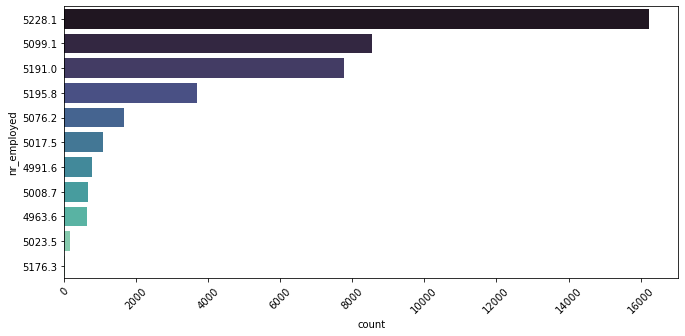

,n_nr_employed
5228.1,16228
5099.1,8532
5191.0,7762
5195.8,3682
5076.2,1662
5017.5,1070
4991.6,773
5008.7,650
4963.6,635
5023.5,172


In [96]:
col_info_horizontal(df, 19, (11,5))

- The nr_employed feature explains, "how many employees are there in the company when the customer is called?"
- The nr_employed feature does not show anomalies
- This feature shows the number of employees in the company tends to be stable around ~5000

**Y Column (Target)**

In [97]:
df_pie = df['y']
df_pie = df_pie.value_counts()
df_pie = df_pie.to_frame().reset_index().rename(columns={'index':'Subscribe', 'y':'Amount'})
df_pie

,Subscribe,Amount
0,no,36537
1,yes,4639


In [98]:
import plotly.express as px
# Plotly Express
fig = px.pie(df_pie,
             names = "Subscribe", 
             values= "Amount",
             title = 'Target Campaign')
fig.show()


- Y is the target to predict
- Y does not show an anomaly
- In this pie plot, we could confirm that the dataset is considered imbalance. Majority of customers (88.7%) are not subscribed to the term deposit and only 11.3% of total customers that subscribe to the term deposit.

## 4.3 Feature Correlation


## **Correlation Between Numerical Feature and Target**

Before we are getting into the insight of the relationhip between numerical data and target, we need to check the feature relationship with correlation test. Because most of the numerical features are not distributed normally, then spearman correlation test is more suitable with this condition

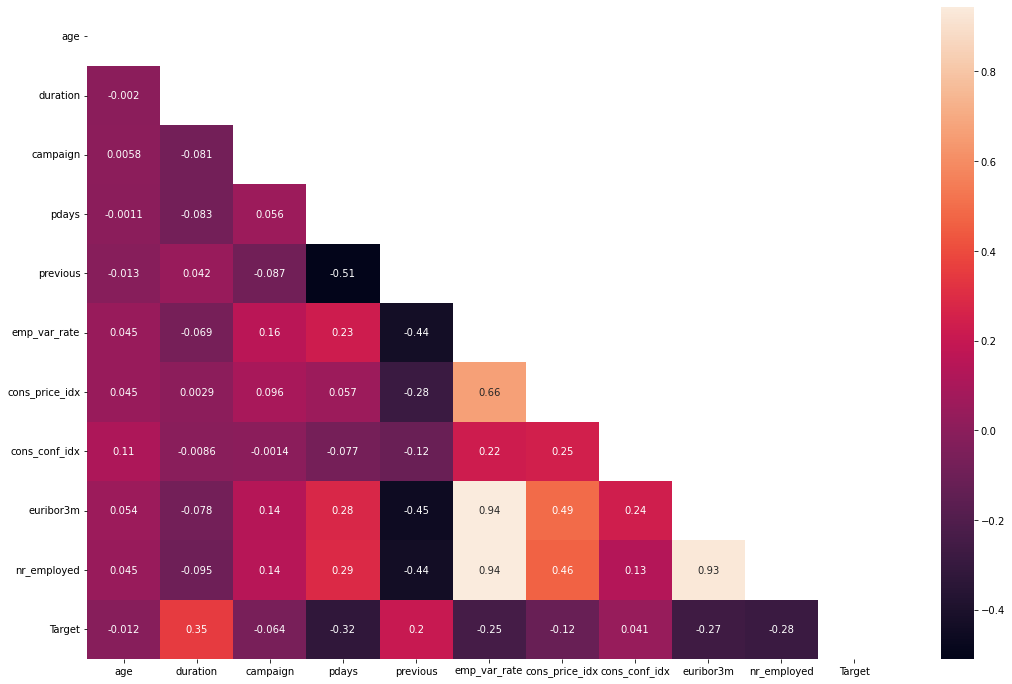

In [99]:
# Pearson correlation 
df_correlation_numerical=df.copy().drop(columns=['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome'])
df_correlation_numerical["Target"]=df_correlation_numerical["y"].apply(lambda x: 1 if x=='yes' else 0)
df_correlation_numerical.drop(columns="y",inplace=True)

plt.figure(figsize=(18,12))
mask = np.triu(np.ones_like(df_correlation_numerical.corr("spearman")))
sns.heatmap(df_correlation_numerical.corr("spearman"), annot=True, mask=mask);

#### **INSIGHT ABOUT NUMERICAL FEATURE CORRELATION**

In [100]:
df[df["pdays"]==999]["poutcome"].value_counts()

nonexistent    35551
failure         4110
Name: poutcome, dtype: int64

,median (no deposit),median (deposit)
pdays,999.0,999.0


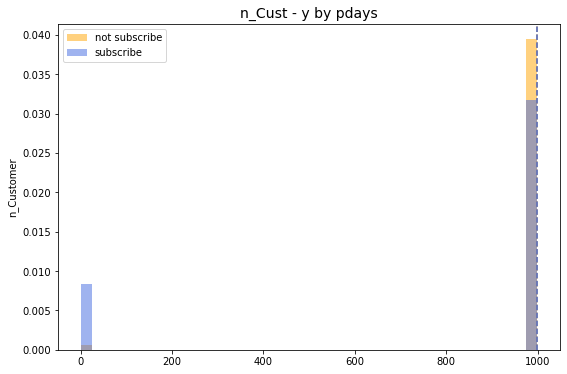

In [101]:
target_n_dependant_numerical_proportion_table(df,list_numerical=["pdays"])
target_n_dependant_numerical_proportion_single(df,"pdays","y")

**Does age has correlation with the customer decision to subscribe ?**

,median (no deposit),median (deposit)
age,38.0,37.0


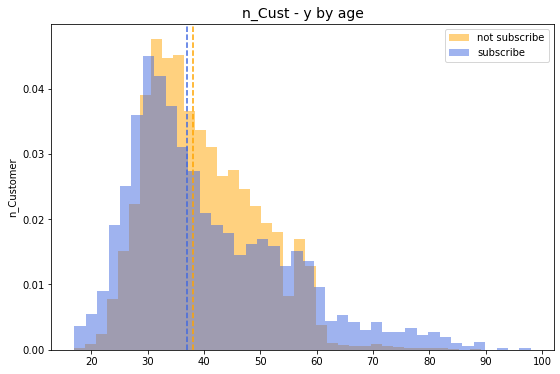

In [102]:
target_n_dependant_numerical_proportion_table(df,list_numerical=["age"])
target_n_dependant_numerical_proportion_single(df_month_modify,"age","y")

From data visulation and graph above it shows that:
- There is no significant trend between customer who are subscribe and who are not subscribe.  

**Does duration and campaign (amount of call) on this campaign have correlation with the customer decision to subscribe ?**

,median (no deposit),median (deposit)
duration,164.0,449.0


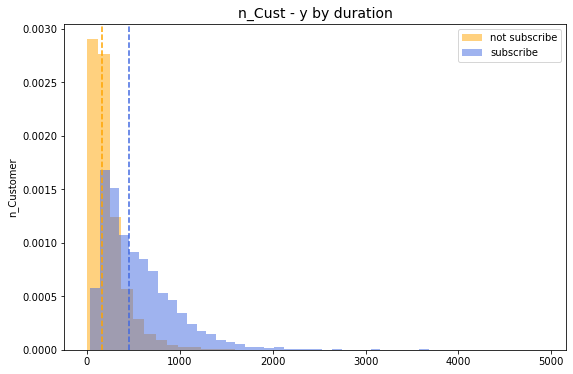

In [103]:
target_n_dependant_numerical_proportion_table(df,list_numerical=["duration"])
target_n_dependant_numerical_proportion_single(df,"duration","y")

From data visulation and graph above it shows that:
- customers who call with a duration of 449 seconds tend to subscribe. Meanwhile, customers are likey to not subscribe if the call duration is 164 seconds
- According to spearman correlation test, duration has the highest correlation score. The correlation can be considered as positive and moderate correlation. This statement can be true because generaly customer that is called with short duration indicate this customer are not interested to the product


For the next step, we want to see the correlation between call duration with campaign feature. By doing this we atleast know the maximum or minimum number of campaign according to customer call duration 

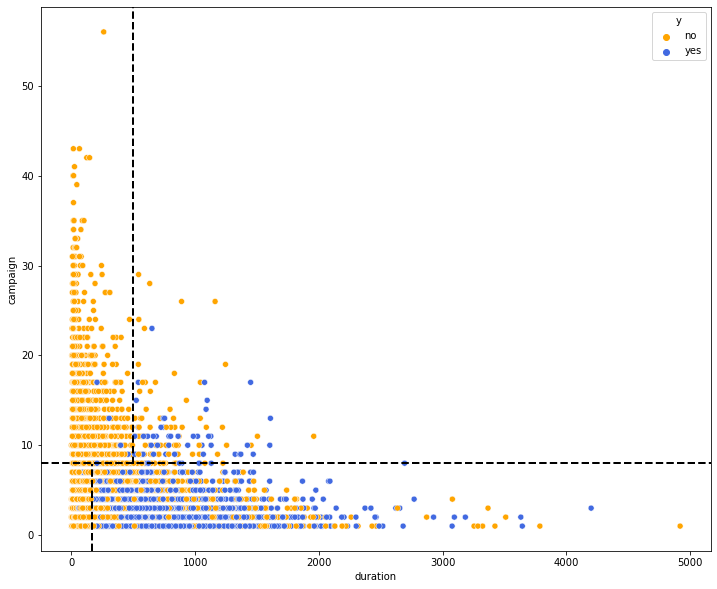

In [104]:
plt.figure(figsize = (12,10))
sns.scatterplot(data = df,x="duration", y = "campaign", hue="y",palette=['orange', 'royalblue'])
plt.axhline(y=8, linewidth=2, color="k", linestyle='--')
plt.axvline(x=500,ymin=0.16,linewidth=2, color="k", linestyle='--')
plt.axvline(x=164,ymax=0.16,linewidth=2, color="k", linestyle='--');

From data visulation and graph above it shows that:

- Customer has a higher chances to subsricbe when the number of contacts performed (campaign) is lower than 8.
- After eight campaign calls, clients are more likely to reject the subscription unless the duration is quite high ( > 600 seconds)


**How does social dan economic context related to the customer Subscription?**

,median (no deposit),median (deposit)
emp_var_rate,1.100,-1.800
cons_price_idx,93.918,93.200
cons_conf_idx,-41.800,-40.400
euribor3m,4.857,1.266
nr_employed,5195.800,5099.100


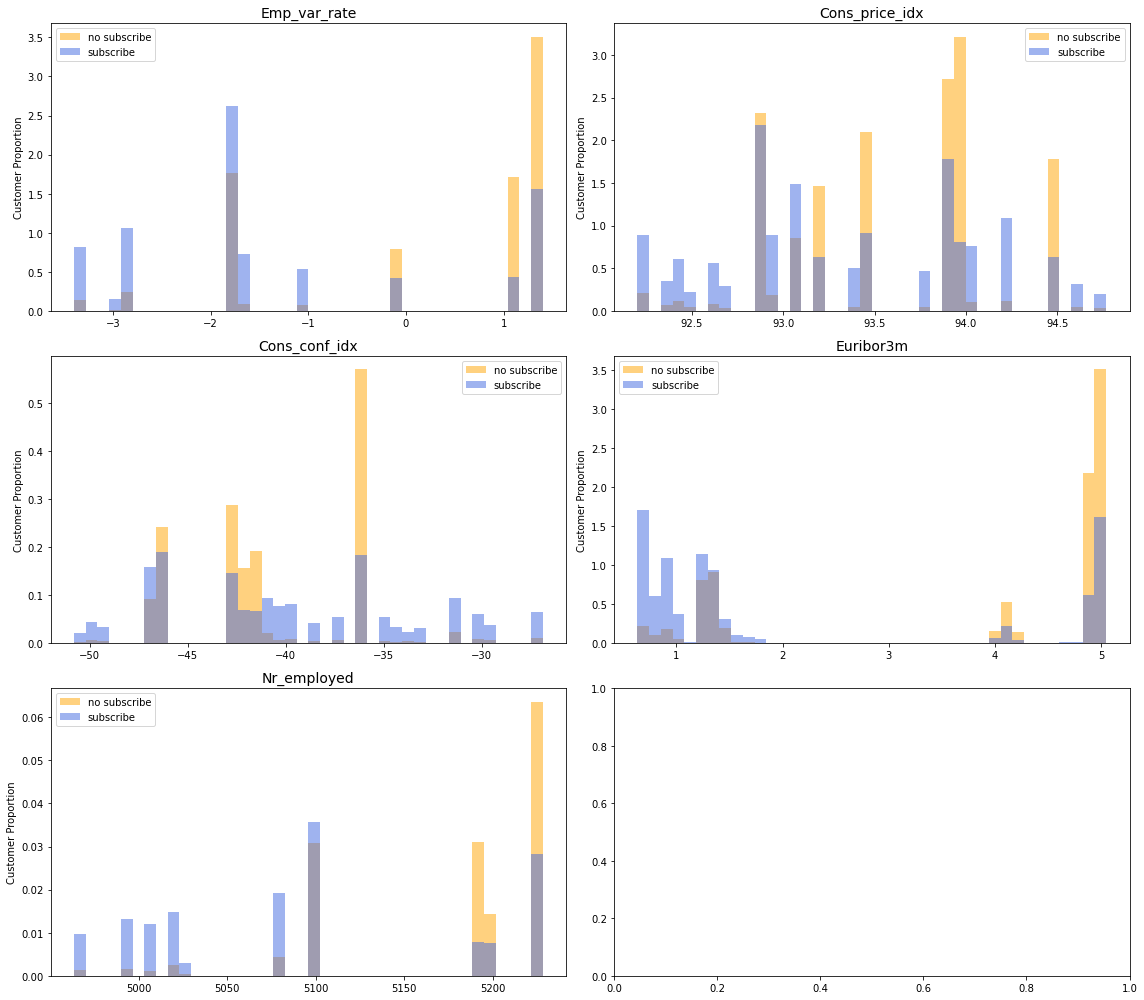

In [105]:
list_socioeconomic=["emp_var_rate","cons_price_idx","cons_conf_idx","euribor3m","nr_employed"]
target="y"

target_n_dependant_numerical_proportion_table(df,list_numerical=list_socioeconomic)
target_n_dependant_numerical_proportion(df,feature_list=list_socioeconomic,target=target,n_col = 2,n_rows=3,figsize = (16,14))

From data visulation and graph above it shows that:
- According to spearman correlation score, the five of the socio-economic feature has a weak to moderate correlation to customer Subscription. However, if we want to look what is the highest spearman correlation score of the socio-economic feature is nr_employed
- The highest correlation score are emp_var_rate with euribor3m and emp_var_rate with nr_employed.
- In this dataset, the customer tend to not subscribe with the increases of emp_var_rate, cons_price_idx, euribor3m, nr_employed. Meanwhile, The customer tend to not subscribe with the decrease of cons_conf_idx or there is no certain tendency.

## **Correlation Between Categorical Feature and Target**

In this subchapter, we are going to relationship between categorical feature and target. Thus is important to check the relationship by using chi-squared test (since chi-squared test is mainly use for deriving realtionship between two categories)

In [106]:
list_categorical=['job','marital','education','default','housing','loan','contact','poutcome','day_of_week','month_num']
list_chi2=[]

for cat_feat in list_categorical:
    ct_df=pd.crosstab(df_month_modify[cat_feat], df_month_modify["y"])
    _, pval, _, expected_table=chi2_contingency(ct_df)
    list_chi2.append(pval)

df_chi2=pd.DataFrame(list_chi2,list_categorical).rename(columns={0:"chi-squared score"})
df_chi2["note"]=df_chi2["chi-squared score"].apply(lambda x: "indepedence" if x>0.05 else "dependence")
df_chi2

,chi-squared score,note
job,3.268412e-199,dependence
marital,1.778423e-26,dependence
education,3.746768e-38,dependence
default,5.217541e-89,dependence
housing,5.663793e-02,indepedence
loan,5.771532e-01,indepedence
contact,1.718741e-189,dependence
poutcome,0.000000e+00,dependence
day_of_week,3.085755e-05,dependence
month_num,0.000000e+00,dependence


#### **INSIGHT ABOUT CATEGORICAL FEATURE CORRELATION**

**Which job type tend to open the term subscribe ?**

,no,yes,%no (normalize=true),%yes (normalize=true)
job,,,,
admin.,9068,1351,22.022537,3.281037
blue-collar,8615,638,20.922382,1.549446
entrepreneur,1332,124,3.234894,0.301146
housemaid,954,106,2.316884,0.257432
management,2596,328,6.304643,0.796581
retired,1284,434,3.118321,1.054012
self-employed,1272,149,3.089178,0.361861
services,3644,323,8.849815,0.784438
student,600,275,1.457160,0.667865


y,%no (normalize=0),%yes (normalize=0)
job,,
admin.,87.033305,12.966695
blue-collar,93.104939,6.895061
entrepreneur,91.483516,8.516484
housemaid,90.000000,10.000000
management,88.782490,11.217510
retired,74.738068,25.261932
self-employed,89.514426,10.485574
services,91.857827,8.142173
student,68.571429,31.428571


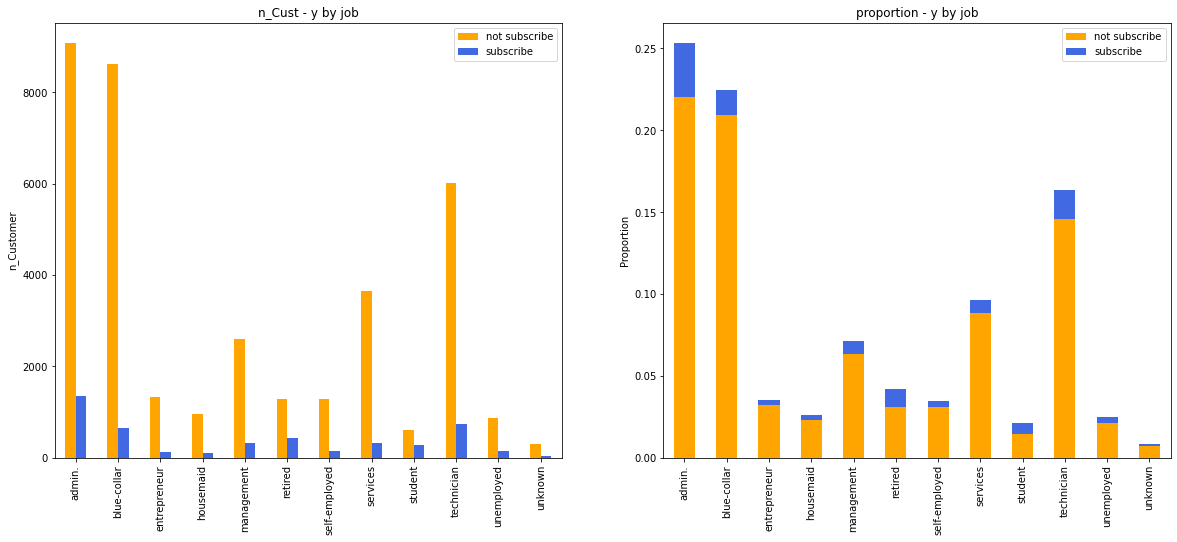

In [107]:
target_n_dependant_categorical_proportion_table(df,"job","y")
target_n_dependant_categorical_single(df,"job","y")

From data visulation and graph (Subscribe by Job) above it shows that:
- Most of the customer that agree to subscribe have a admin type of work (3% of the total data). However, if it is compared to the non-susbcribed customer who are working as admin (22% of the total data), this number is really small. 
- Job type Student are top 3 job type of customer who tend to agree to subscribe.


,age median (not subsribed)
job,
admin.,35.0
blue-collar,38.0
entrepreneur,41.0
housemaid,52.5
management,40.5
retired,68.0
self-employed,36.0
services,33.0
student,24.0


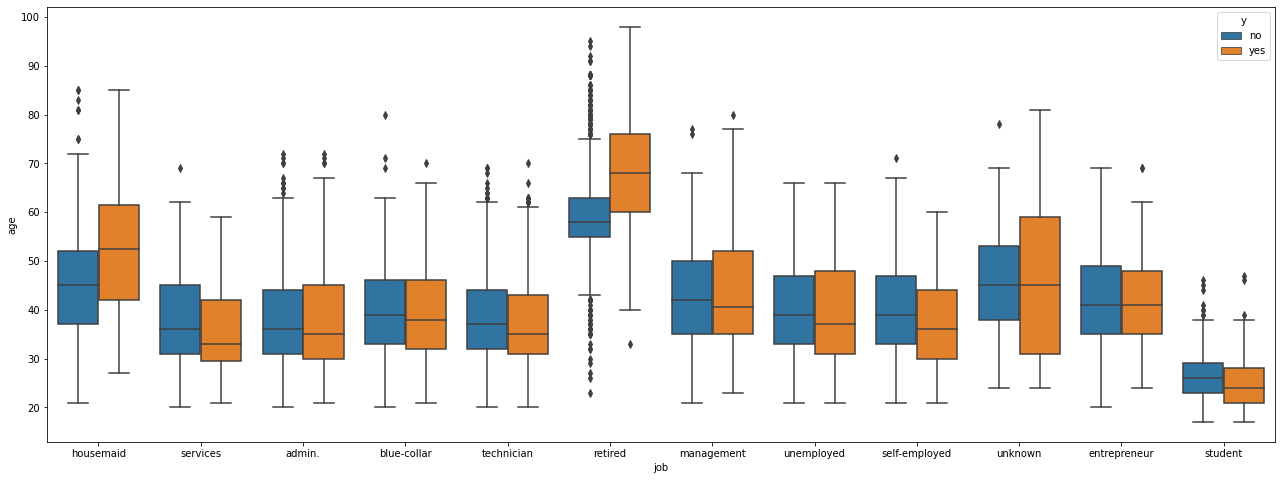

In [108]:
plt.figure(figsize = (22,8))
sns.boxplot(data = df,x="job",y="age",hue="y")

df_job_duration=df[df["y"]=="no"].groupby("job").median()[["age"]].rename(columns={"age":"age median (not subsribed)"})
df_job_duration["age median (not subsribed)"]=df[df["y"]=="yes"].groupby("job").median()[["age"]]
df_job_duration

From data visulation and graph above it shows that:
- the campaign are more target towards experinced job level which can be seen by the median for most of the job is around 30 to 50 y/o except student. This because student age range mostly around 20 y/o.
- Most of the customer's job who are tend to deposit has a higher median than who are not tend to deposit except housemaid and retired.

Now, we want to look more towards the correlation between job type and the call duration 

,duration median (not subsribed),duration median (subscribed)
job,,
admin.,157.0,410.0
blue-collar,174.0,664.0
entrepreneur,163.5,615.5
housemaid,161.5,421.0
management,166.0,425.5
retired,159.0,323.5
self-employed,157.0,465.0
services,170.0,588.0
student,163.0,301.0


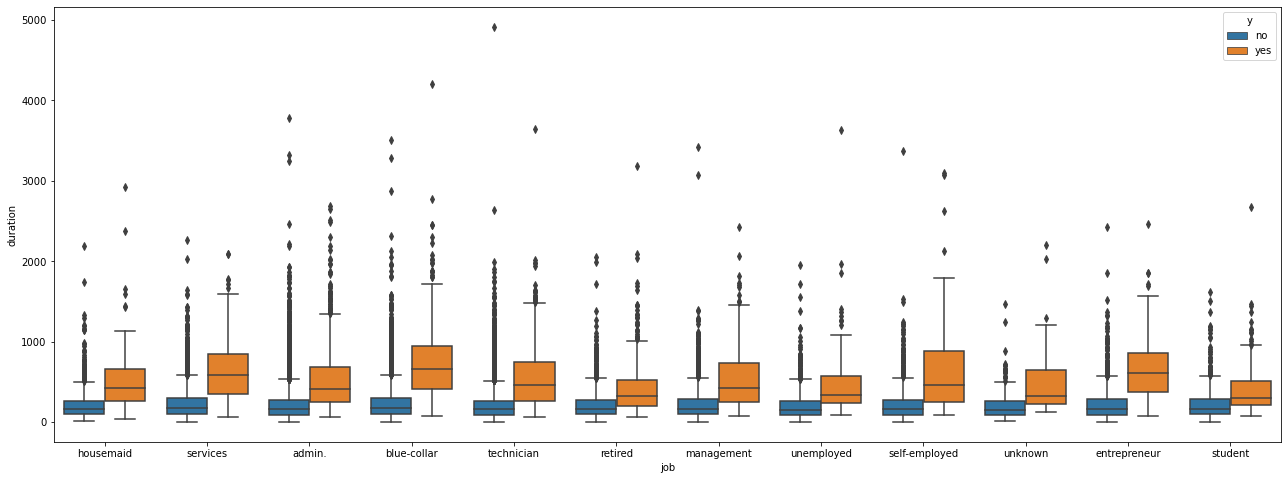

In [109]:
plt.figure(figsize = (22,8))
sns.boxplot(data = df,x="job",y="duration",hue="y")

df_job_duration=df[df["y"]=="no"].groupby("job").median()[["duration"]].rename(columns={"duration":"duration median (not subsribed)"})
df_job_duration["duration median (subscribed)"]=df[df["y"]=="yes"].groupby("job").median()[["duration"]]
df_job_duration

From data visulation and graph above it shows that:
- Comparing the duration median, most of the blue collar and entrepreneur that agree to subscribe have high duration in calls. On the other hand, student and retired have less duration in average.
- Customer for all of the job type who have not agree to subscribe are likely to have lesser call duration. 
- If we compare customer who have not agree to subscribe for each job type, there is no big difference in median duration

**Does marital status relate on customer's decision to subscribe ?**

,no,yes,%no (normalize=true),%yes (normalize=true)
marital,,,,
divorced,4135,476,10.042258,1.156013
married,22390,2531,54.376336,6.146785
single,9944,1620,24.149990,3.934331
unknown,68,12,0.165145,0.029143


y,%no (normalize=0),%yes (normalize=0)
marital,,
divorced,89.676860,10.323140
married,89.843907,10.156093
single,85.991007,14.008993
unknown,85.000000,15.000000


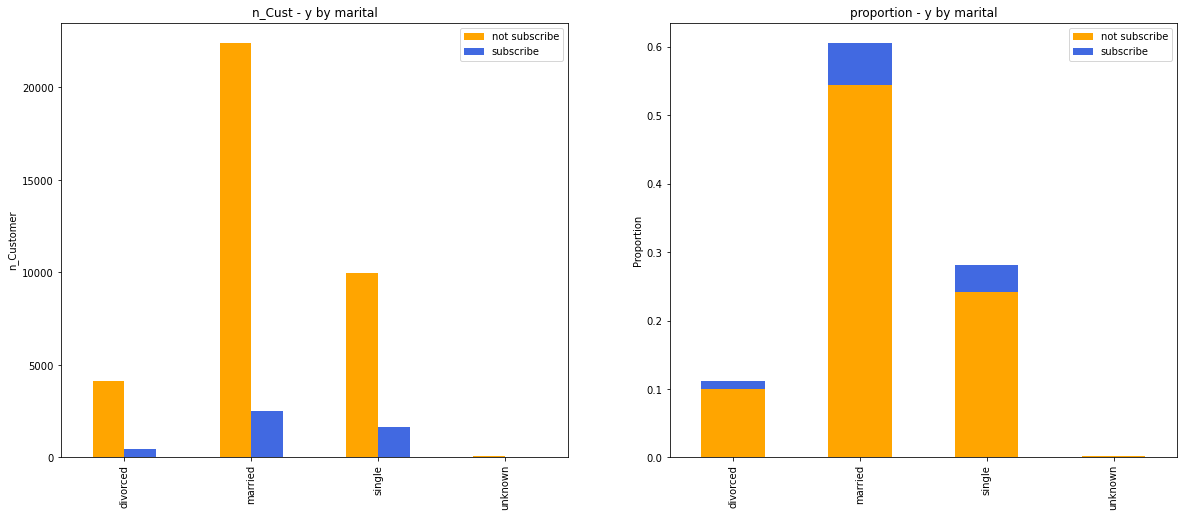

In [110]:
target_n_dependant_categorical_proportion_table(df,"marital","y")
target_n_dependant_categorical_single(df,"marital","y")

From data visulation and graph (Subscribe by marital) above it shows that: 
- Customer who subscribe the most is married customer but this does not mean that this marital status have a higher tendecy to subscribe compare to the other marital status (6% of the total data).
- "Unknown" in marital column tend to agree to subscribe compare to the other marital status. However, unknown will be treated as missing value. Thus, marital status that tend to subscribe is single (14% of the total data).

,age median (not subscribed),age median (subscribed)
marital,,
divorced,44.0,47.0
married,41.0,43.0
single,32.0,30.0
unknown,35.5,34.0


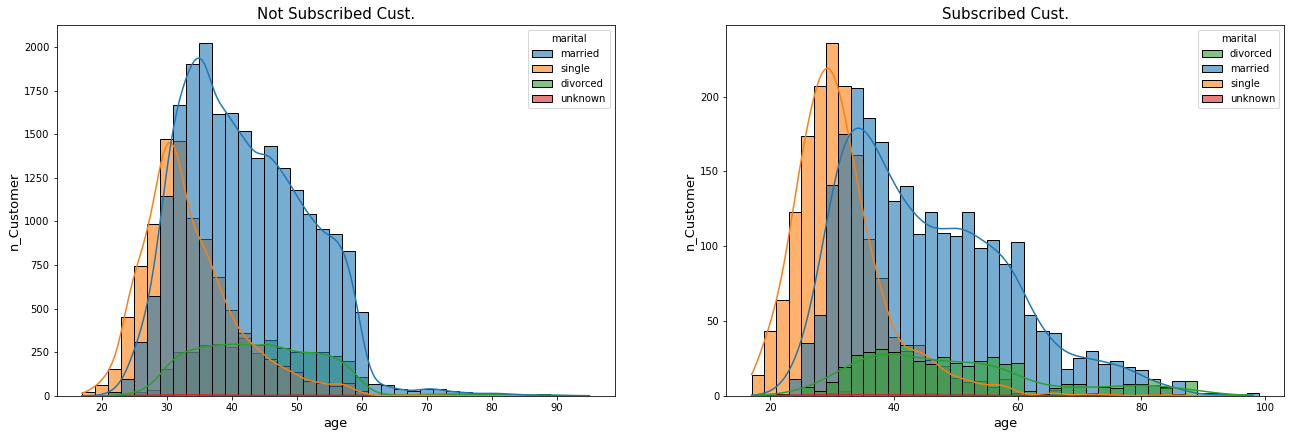

pvalue married (mannwhitney) =  3.7201434223561303e-22
pvalue single (mannwhitney) =  4.4373977830813696e-36


In [111]:
palette ={"married": "C0", "single": "C1", "divorced": "C2", "unknown": "C3"}
plt.figure(figsize = (22,15))
plt.subplot(221)
sns.histplot(data = df[df["y"] == "no"],x="age",hue="marital",binwidth=2,kde=True,palette=palette,alpha = 0.6)
plt.title("Not Subscribed Cust.", fontsize = 15)
plt.xlabel("age", size = 13)
plt.ylabel("n_Customer", size = 13)
plt.subplot(222)
sns.histplot(data = df[df["y"] == "yes"],x="age",hue="marital",binwidth=2,kde=True,palette=palette,alpha = 0.6)
plt.title("Subscribed Cust.", fontsize = 15)
plt.xlabel("age", size = 13)
plt.ylabel("n_Customer", size = 13)

from scipy.stats import mannwhitneyu
df_marital_age=df[df["y"]=="no"].groupby("marital").median()[["age"]].rename(columns={"age":"age median (not subscribed)"})
df_marital_age["age median (subscribed)"]=df[df["y"]=="yes"].groupby("marital").median()[["age"]]

df_married=df[df["marital"]=="married"]

stat,pvalue_mann_married=mannwhitneyu(
    df_married[df_married["y"]=="yes"]["age"],
    df_married[df_married["y"]=="no"]["age"]    
)

df_single=df[df["marital"]=="single"]

stat,pvalue_mann_single=mannwhitneyu(
    df_single[df_single["y"]=="yes"]["age"],
    df_single[df_single["y"]=="no"]["age"]    
)

display(HTML(df_marital_age.to_html()))
plt.show()
print("pvalue married (mannwhitney) = ",pvalue_mann_married)
print("pvalue single (mannwhitney) = ",pvalue_mann_single)

From data visulation and graph above it shows that:
- Married customers who are 43 y/o tend to subscribe. On the other hand, Married customers who are 41 y/o tend not to subscribe. 
- Single customer who are 30 y/o tend to subscribe. On the other hand, Single customer who are 32 y/o tend not tosubscribe. 

In [112]:
from scipy.stats import mannwhitneyu

stat,pvalue_mann=mannwhitneyu(
    df[df["y"]=="yes"]["age"],
    df[df["y"]=="no"]["age"]    
)

pvalue_mann

0.01563777740572028

In [113]:
df_married=df[df["marital"]=="married"]

stat,pvalue_mann=mannwhitneyu(
    df_married[df_married["y"]=="yes"]["age"],
    df_married[df_married["y"]=="no"]["age"]    
)

pvalue_mann

3.7201434223561303e-22

In [114]:
df_single=df[df["marital"]=="single"]

stat,pvalue_mann=mannwhitneyu(
    df_single[df_single["y"]=="yes"]["age"],
    df_single[df_single["y"]=="no"]["age"]    
)

pvalue_mann

4.4373977830813696e-36

**How customer's last education relate on Subscription?**

,no,yes,%no (normalize=true),%yes (normalize=true)
education,,,,
basic.4y,3748,428,9.102390,1.039440
basic.6y,2103,188,5.107344,0.456577
basic.9y,5572,473,13.532155,1.148727
high.school,8481,1031,20.596950,2.503886
illiterate,14,4,0.034000,0.009714
professional.course,4645,595,11.280843,1.445017
university.degree,10495,1669,25.488148,4.053332
unknown,1479,251,3.591898,0.609578


y,%no (normalize=0),%yes (normalize=0)
education,,
basic.4y,89.750958,10.249042
basic.6y,91.793976,8.206024
basic.9y,92.175352,7.824648
high.school,89.161060,10.838940
illiterate,77.777778,22.222222
professional.course,88.645038,11.354962
university.degree,86.279184,13.720816
unknown,85.491329,14.508671


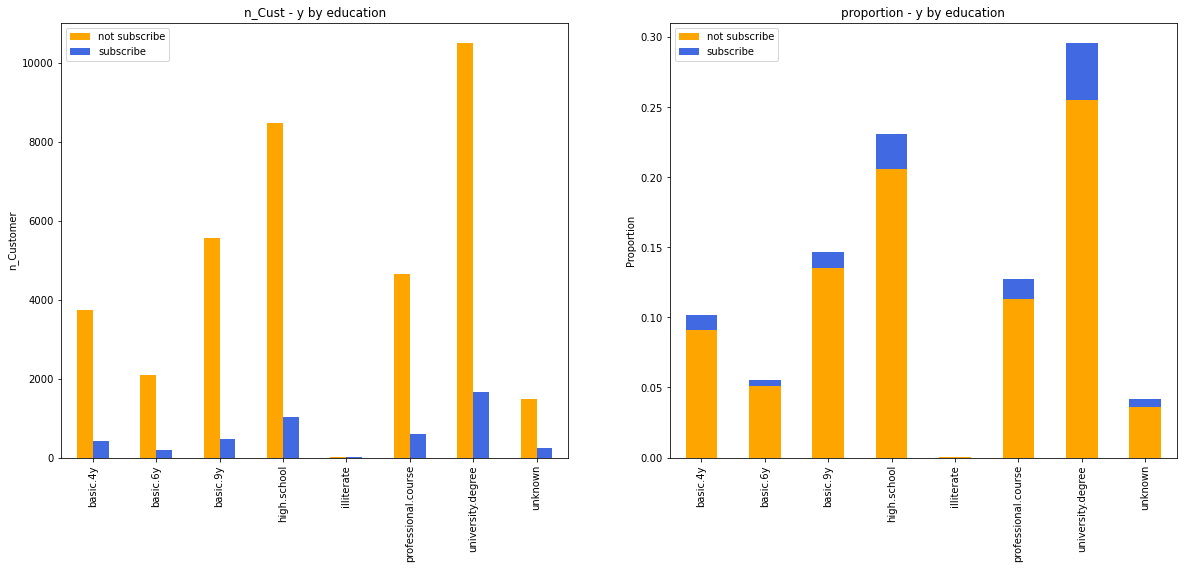

In [115]:
target_n_dependant_categorical_proportion_table(df,"education","y")
target_n_dependant_categorical_single(df,"education","y")

From data visulation and graph (subscribe by education) above it shows that: 
- Customer who are graduated form university has the highest percentage of total customer data.
- Illiterate tend to agree to open subscribe term compare to the other last education. However, customer who are the last education is illiterate only taking a small account (0.04%) from total customer data

**Does personal loan and housing loan feature has a relationship with the customer decision to subscribe?**

,no,yes,%no (normalize=true),%yes (normalize=true)
loan,,,,
no,30089,3849,73.074121,9.347678
unknown,883,107,2.144453,0.259860
yes,5565,683,13.515154,1.658733


y,%no (normalize=0),%yes (normalize=0)
loan,,
no,88.658731,11.341269
unknown,89.191919,10.808081
yes,89.068502,10.931498


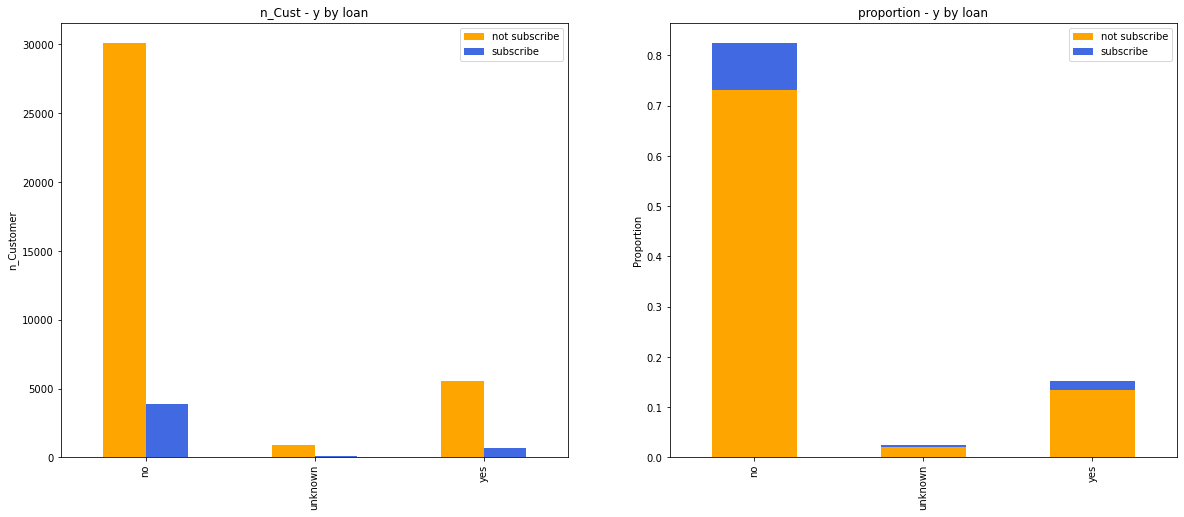

,no,yes,%no (normalize=true),%yes (normalize=true)
housing,,,,
no,16590,2025,40.290460,4.917913
unknown,883,107,2.144453,0.259860
yes,19064,2507,46.298815,6.088498


y,%no (normalize=0),%yes (normalize=0)
housing,,
no,89.121676,10.878324
unknown,89.191919,10.808081
yes,88.377915,11.622085


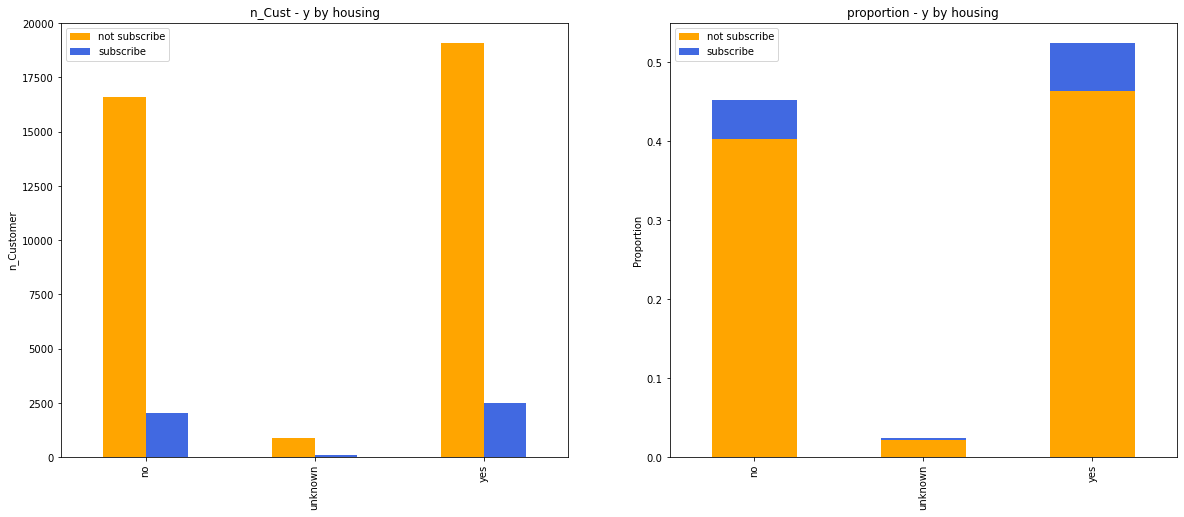

In [116]:
target_n_dependant_categorical_proportion_table(df,"loan","y")
target_n_dependant_categorical_single(df,"loan","y")
target_n_dependant_categorical_proportion_table(df,"housing","y")
target_n_dependant_categorical_single(df,"housing","y")

From data visulation and graph (Subscription by loan and housing) above it shows that:
- Loan and housing feature are independence towards the target (according to chi-squared test). Thus, this imply that loan and housing feature dont have relationship to the customer decision to subscribe.
- However, it does not mean that we will drop these feature later for the modeling. The reason is because we afraid that this feature will be important if it is combine with other feature.

**Should cellphones or telephones be used to improve consumer interest to subscribe ?**

,no,yes,%no (normalize=true),%yes (normalize=true)
contact,,,,
cellular,22283,3852,54.116476,9.354964
telephone,14254,787,34.617253,1.911308


y,%no (normalize=0),%yes (normalize=0)
contact,,
cellular,85.261144,14.738856
telephone,94.767635,5.232365


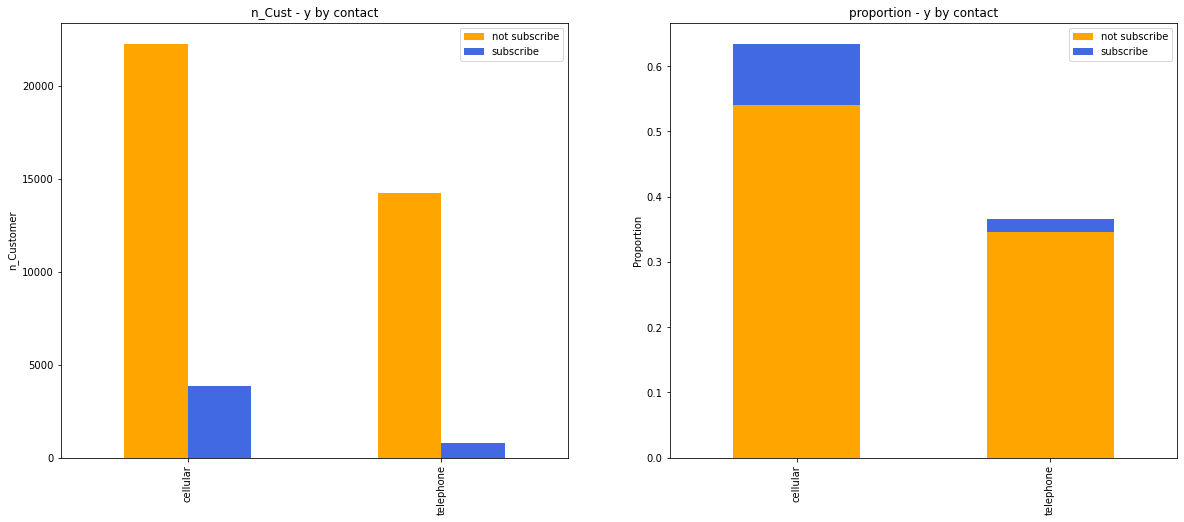

In [117]:
target_n_dependant_categorical_proportion_table(df,"contact","y")
target_n_dependant_categorical_single(df,"contact","y")

From data visulation and graph (susbcribe by contact) above it shows that:
- Previous campaign mainly use cellular to promote the product 
- Most of the customer agree and have a higher tendency to subscribe if they are contacted by cellular rather than telephone. 

Now, we want to look more toward the correaltion between contact, month and its subscribtion rate.

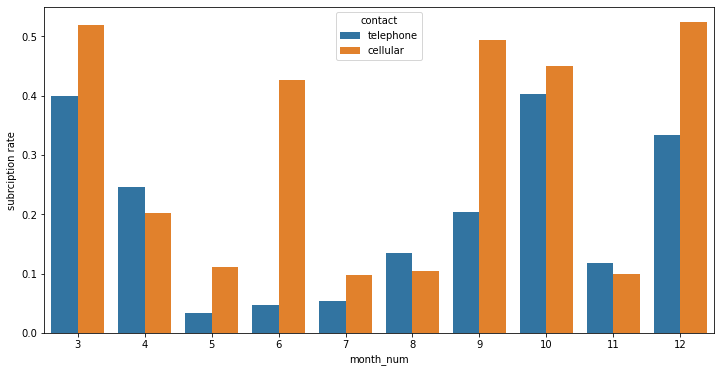

In [118]:
df_month_modify["target"]=df_month_modify["y"].apply(lambda x: 1 if x=="yes" else 0)
barplot_mean(x='month_num', y='target', df=df_month_modify, hue="contact")

From data visulation and graph (susbcribe by contact) above it shows that:
- The customer tend to deposit if they were contacted by celluler in most of the month. However, in April, August, and November, customer tend to deposit if they were contacted by telephone. 

**Do customers tends to susbcribe if the outcome on previous campagin is success?**

,no,yes,%no (normalize=true),%yes (normalize=true)
poutcome,,,,
failure,3647,605,8.857101,1.469303
nonexistent,32411,3140,78.713328,7.625801
success,479,894,1.163299,2.171168


y,%no (normalize=0),%yes (normalize=0)
poutcome,,
failure,85.771402,14.228598
nonexistent,91.167618,8.832382
success,34.887109,65.112891


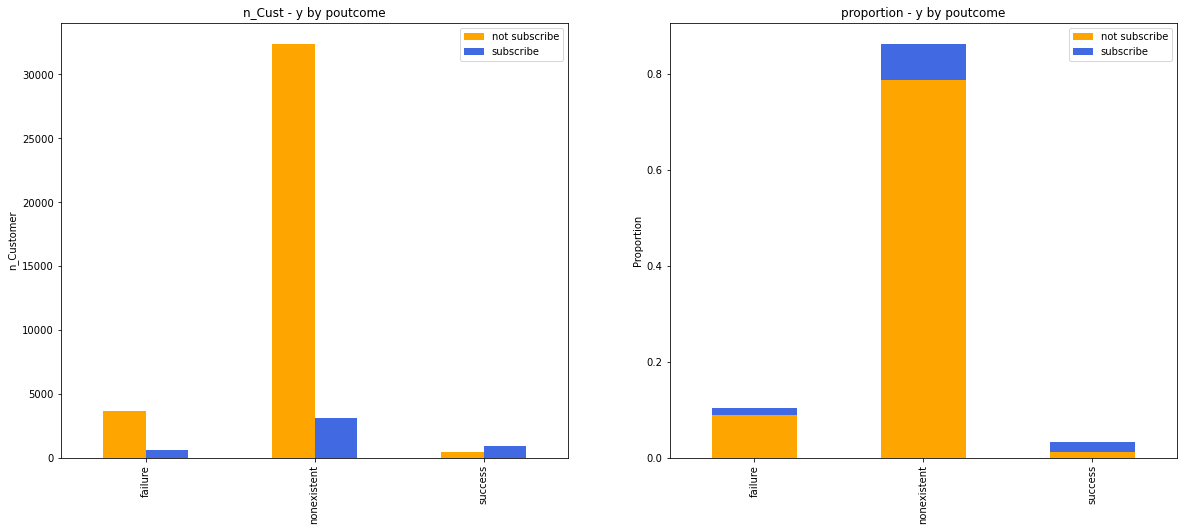

In [119]:
target_n_dependant_categorical_proportion_table(df,"poutcome","y")
target_n_dependant_categorical_single(df,"poutcome","y")

From data visulation and graph (Subscription by poutcome) above it shows that:
- Customers who were a success in previous campaign are likely to subscribe than a person who was a failure
- 30 % customer who are success in previous campaign decide not to subscribe again

**When is the best time to attract customers, so They decide to subscribe?**

,no,yes,%no (normalize=true),%yes (normalize=true)
month_num,,,,
3,270,276,0.655722,0.670293
4,2092,539,5.080629,1.309015
5,12881,886,31.282786,2.151739
6,4759,559,11.557704,1.357587
7,6521,648,15.836895,1.573732
8,5521,655,13.408296,1.590732
9,314,256,0.762580,0.621721
10,402,315,0.976297,0.765009
11,3684,416,8.946959,1.010297


y,%no (normalize=0),%yes (normalize=0)
month_num,,
3,49.450549,50.549451
4,79.513493,20.486507
5,93.564320,6.435680
6,89.488530,10.511470
7,90.961082,9.038918
8,89.394430,10.605570
9,55.087719,44.912281
10,56.066946,43.933054
11,89.853659,10.146341


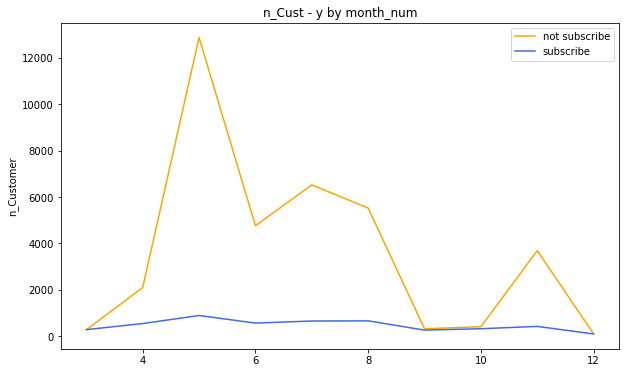

,no,yes,%no (normalize=true),%yes (normalize=true)
day_of_week,,,,
fri,6980,846,16.951622,2.054595
mon,7665,847,18.615213,2.057024
thu,7574,1044,18.394210,2.535458
tue,7133,953,17.323198,2.314455
wed,7185,949,17.449485,2.304741


y,%no (normalize=0),%yes (normalize=0)
day_of_week,,
fri,89.189880,10.810120
mon,90.049342,9.950658
thu,87.885820,12.114180
tue,88.214197,11.785803
wed,88.332924,11.667076


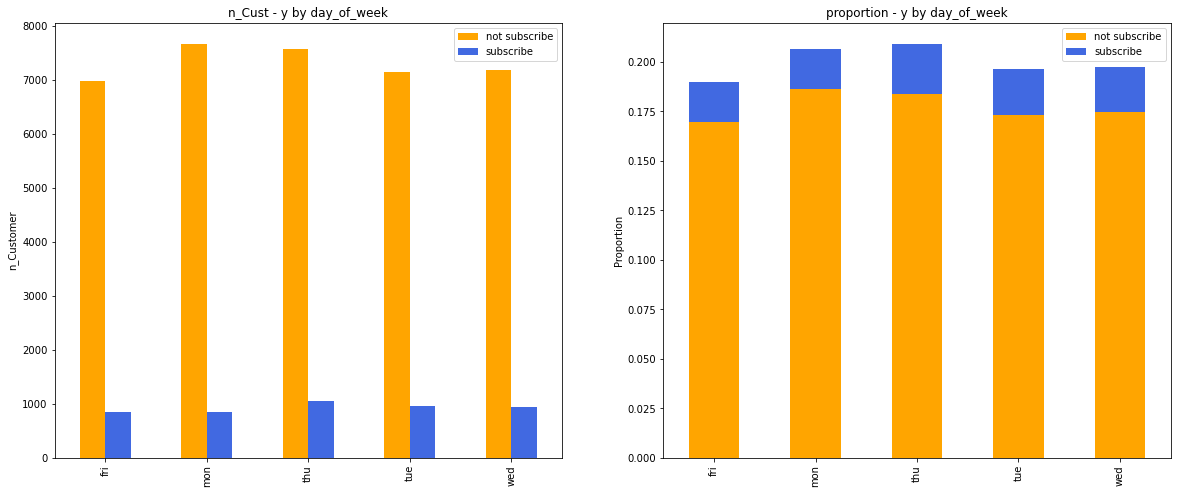

In [120]:
target_n_dependant_categorical_proportion_table(df_month_modify,"month_num","y")
target_n_dependant_categorical_single(df_month_modify,"month_num","y")
print("")
target_n_dependant_categorical_proportion_table(df,"day_of_week","y")
target_n_dependant_categorical_single(df,"day_of_week","y")

From data visulation and graph (Subscription by month and day_of_week) above it shows that:

- According to month, the highest percentage customer that tend to subscribe in the current campaign is on March, followed by December and September.
- According to day, The highest percentage customer that tend to subscribe in the current campaign is on Thursday, followed by Tuesday and Wednesday.

# 5 Missing Value and Outliers

**Handling Missing Value**

In [121]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [122]:
pd.set_option('display.max_colwidth',-1)
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])
df_overview=pd.DataFrame(columns=['Column Name','Number of Unique','Unique Sample'],data=listItem)

desc=[
    "age",
    "type of job",
    "marital status",
    "Education",
    "has credit in default?",
    "has housing loan?",
    "has personal loan?",
    "contact communication type",
    "last contact month of year",
    "last contact day of the week",
    "last contact duration, in seconds",
    "number of contacts performed during this campaign and for this client",
    "number of days that passed by after the client was last contacted from a previous campaign",
    "number of contacts performed before this campaign and for this client",
    "outcome of the previous marketing campaign",
    "employment variation rate - quarterly indicator",
    "consumer price index - monthly indicator",
    "consumer confidence index - monthly indicator",
    "euribor 3 month rate - daily indicator",
    "number of employees - quarterly indicator",
    "has the client subscribed a term deposit?"
]

col_cat =[
    "bank client data",
    "bank client data",
    "bank client data",
    "bank client data",
    "bank client data",
    "bank client data",
    "bank client data",
    "related with the last contact of the current campaign",
    "related with the last contact of the current campaign",
    "related with the last contact of the current campaign",
    "related with the last contact of the current campaign",
    "other attributes",
    "other attributes",
    "other attributes",
    "other attributes",
    "social and economic context attributes",
    "social and economic context attributes",
    "social and economic context attributes",
    "social and economic context attributes",
    "social and economic context attributes",
    "Target"
]

col_type =[
    "Numerical",
    "Categorical",
    "Categorical",
    "Categorical",
    "Categorical",
    "Categorical",
    "Categorical",
    "Categorical",
    "Categorical",
    "Categorical",
    "Numerical",
    "Numerical",
    "Numerical",
    "Numerical",
    "Categorical",
    "Numerical",
    "Numerical",
    "Numerical",
    "Numerical",
    "Numerical",
    "Categorical"
]

df_overview.insert(1,"Column Description",desc)
df_overview.insert(1,"Column Cat.",col_cat)
df_overview.insert(5,"Type",col_type)
df_overview

,Column Name,Column Cat.,Column Description,Number of Unique,Unique Sample,Type
0,age,bank client data,age,78,"[56, 57, 37, 40, 45, 59, 41, 24, 25, 29, 35, 54, 46, 50, 39, 30, 55, 49, 34, 52, 58, 32, 38, 44, 42, 60, 53, 47, 51, 48, 33, 31, 43, 36, 28, 27, 26, 22, 23, 20, 21, 61, 19, 18, 70, 66, 76, 67, 73, 88, 95, 77, 68, 75, 63, 80, 62, 65, 72, 82, 64, 71, 69, 78, 85, 79, 83, 81, 74, 17, 87, 91, 86, 98, 94, 84, 92, 89]",Numerical
1,job,bank client data,type of job,12,"[housemaid, services, admin., blue-collar, technician, retired, management, unemployed, self-employed, unknown, entrepreneur, student]",Categorical
2,marital,bank client data,marital status,4,"[married, single, divorced, unknown]",Categorical
3,education,bank client data,Education,8,"[basic.4y, high.school, basic.6y, basic.9y, professional.course, unknown, university.degree, illiterate]",Categorical
4,default,bank client data,has credit in default?,3,"[no, unknown, yes]",Categorical
5,housing,bank client data,has housing loan?,3,"[no, yes, unknown]",Categorical
6,loan,bank client data,has personal loan?,3,"[no, yes, unknown]",Categorical
7,contact,related with the last contact of the current campaign,contact communication type,2,"[telephone, cellular]",Categorical
8,month,related with the last contact of the current campaign,last contact month of year,10,"[may, jun, jul, aug, oct, nov, dec, mar, apr, sep]",Categorical
9,day_of_week,related with the last contact of the current campaign,last contact day of the week,5,"[mon, tue, wed, thu, fri]",Categorical


As we see above there is no missing value, but when we check the unique value we found some data that "unknown" and we will handle the "unkwnown" data as missing value.

Column job, marital, education, default, housing, loan are the categorical column that have "unknown" unique value and here we will treat that as missing value and fill it with their mode.

In [123]:
# Replace 'unknown' into NaN
df['job'] = df ['job'].replace({'unknown':None})
df['marital'] = df ['marital'].replace({'unknown':None})
df['education'] = df ['education'].replace({'unknown':None})
df['default'] = df ['default'].replace({'unknown':None})
df['housing'] = df ['housing'].replace({'unknown':None})
df['loan'] = df ['loan'].replace({'unknown':None})

In [124]:
df.isna().sum()

age               0   
job               330 
marital           80  
education         1730
default           8596
housing           990 
loan              990 
contact           0   
month             0   
day_of_week       0   
duration          0   
campaign          0   
pdays             0   
previous          0   
poutcome          0   
emp_var_rate      0   
cons_price_idx    0   
cons_conf_idx     0   
euribor3m         0   
nr_employed       0   
y                 0   
dtype: int64

In [125]:
# Filling missing value with mode
df['job'] = df ['job'].fillna(df['job'].mode()[0])
df['marital'] = df ['marital'].fillna(df['marital'].mode()[0])
df['education'] = df ['education'].fillna(df['education'].mode()[0])
df['default'] = df ['default'].fillna(df['default'].mode()[0])
df['housing'] = df ['housing'].fillna(df['housing'].mode()[0])
df['loan'] = df ['loan'].fillna(df['loan'].mode()[0])

In [126]:
df.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

There are no missing value

**Handling Outlier**

In handling outlier, we will see in 2 ways, handling by delete all the upper fence and lower fence (see the IQR) and manually by see the box plot

In [127]:
df.shape

(41176, 21)

In [128]:
# Delete all outlier by see IQR
df_outlier1 = df.copy()

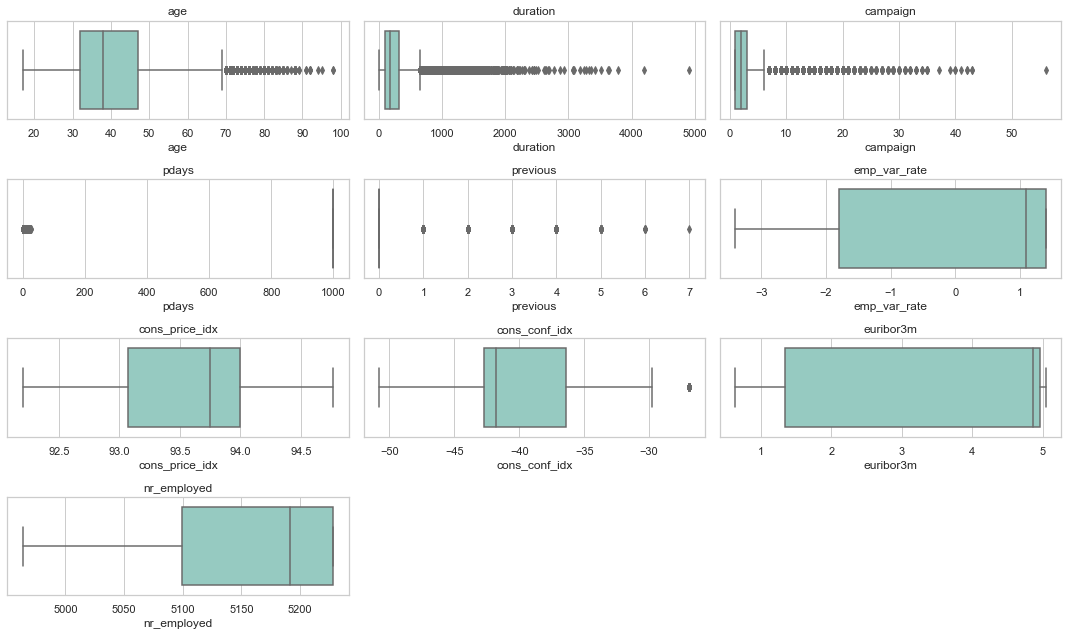

In [129]:
# Numerical Features
num_feature = [fea for fea in df_outlier1.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=feature, data=df_outlier1);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

In [130]:
def outliers(col):

    q3 = col.describe().loc['75%']
    q1 = col.describe().loc['25%']

    iqr = q3-q1

    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr

    print('Upper fence: ', upper)
    print('Lower fence: ', lower)

In [131]:
# Here is the upper fence and lower fence

for i in list(df_outlier1.describe()):
    print(i)
    outliers(df_outlier1[i])

age
Upper fence:  69.5
Lower fence:  9.5
duration
Upper fence:  644.5
Lower fence:  -223.5
campaign
Upper fence:  6.0
Lower fence:  -2.0
pdays
Upper fence:  999.0
Lower fence:  999.0
previous
Upper fence:  0.0
Lower fence:  0.0
emp_var_rate
Upper fence:  6.200000000000001
Lower fence:  -6.6000000000000005
cons_price_idx
Upper fence:  95.3725
Lower fence:  91.69650000000001
cons_conf_idx
Upper fence:  -26.949999999999992
Lower fence:  -52.150000000000006
euribor3m
Upper fence:  10.3865
Lower fence:  -4.081499999999999
nr_employed
Upper fence:  5421.6
Lower fence:  4905.6


In [132]:
df_outlier1.shape

(41176, 21)

In [133]:
# Delete outlier one by one
df_outlier1 = df_outlier1[(df_outlier1['age'] >= 9.5) & (df_outlier1['age'] <= 69.5)]
print(df_outlier1.shape)

df_outlier1 = df_outlier1[(df_outlier1['duration'] >= -223.5) & (df_outlier1['duration'] <= 644.5)]
print(df_outlier1.shape)

df_outlier1 = df_outlier1[(df_outlier1['campaign'] >= -2.0) & (df_outlier1['campaign'] <= 6.0)]
print(df_outlier1.shape)

df_outlier1 = df_outlier1[(df_outlier1['pdays'] >= 999.0) & (df_outlier1['pdays'] <= 999.0)]
print(df_outlier1.shape)

df_outlier1 = df_outlier1[(df_outlier1['emp_var_rate'] >= -6.60) & (df_outlier1['emp_var_rate'] <= 6.2)]
print(df_outlier1.shape)

df_outlier1 = df_outlier1[(df_outlier1['cons_price_idx'] >= 91.6965) & (df_outlier1['cons_price_idx'] <= 95.3725)]
print(df_outlier1.shape)

df_outlier1 = df_outlier1[(df_outlier1['cons_conf_idx'] >= -52.15) & (df_outlier1['cons_conf_idx'] <= -26.949)]
print(df_outlier1.shape)

df_outlier1 = df_outlier1[(df_outlier1['euribor3m'] >= -4.08149) & (df_outlier1['euribor3m'] <= 10.3865)]
print(df_outlier1.shape)

df_outlier1 = df_outlier1[(df_outlier1['nr_employed'] >= 4905.6) & (df_outlier1['nr_employed'] <= 5421.6)]
print(df_outlier1.shape)


(40708, 21)
(37773, 21)
(35524, 21)
(34256, 21)
(34256, 21)
(34256, 21)
(33959, 21)
(33959, 21)
(33959, 21)


In [134]:
df_outlier1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33959 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             33959 non-null  int64  
 1   job             33959 non-null  object 
 2   marital         33959 non-null  object 
 3   education       33959 non-null  object 
 4   default         33959 non-null  object 
 5   housing         33959 non-null  object 
 6   loan            33959 non-null  object 
 7   contact         33959 non-null  object 
 8   month           33959 non-null  object 
 9   day_of_week     33959 non-null  object 
 10  duration        33959 non-null  int64  
 11  campaign        33959 non-null  int64  
 12  pdays           33959 non-null  int64  
 13  previous        33959 non-null  int64  
 14  poutcome        33959 non-null  object 
 15  emp_var_rate    33959 non-null  float64
 16  cons_price_idx  33959 non-null  float64
 17  cons_conf_idx   33959 non-null 

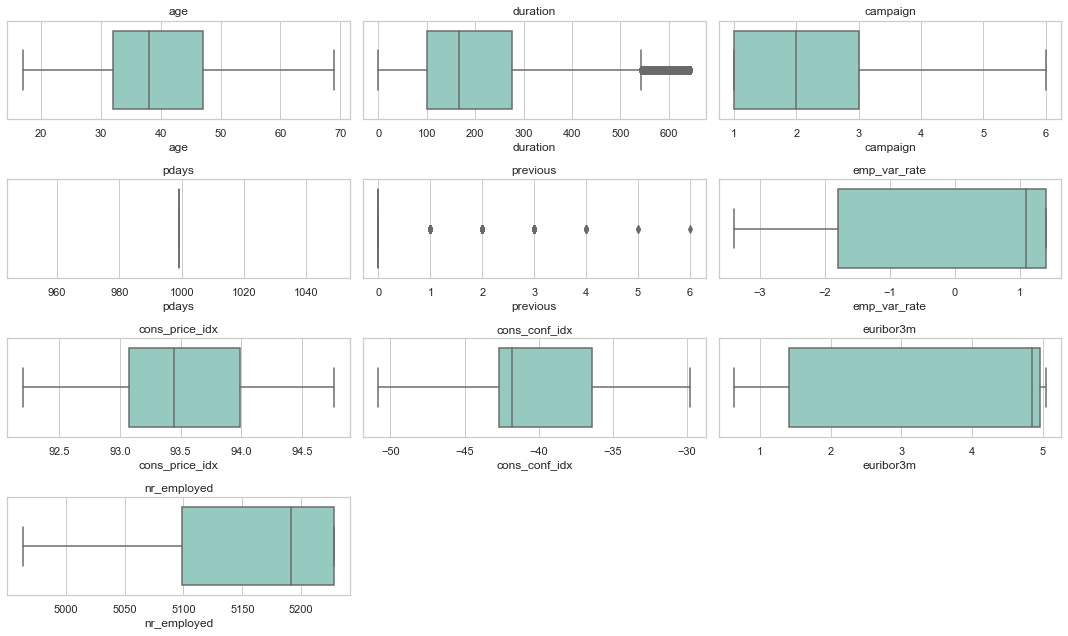

In [135]:
# Numerical Features
num_feature = [fea for fea in df_outlier1.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=feature, data=df_outlier1);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

In [136]:
# Delete outlier manually 
df_outlier2 = df.copy()

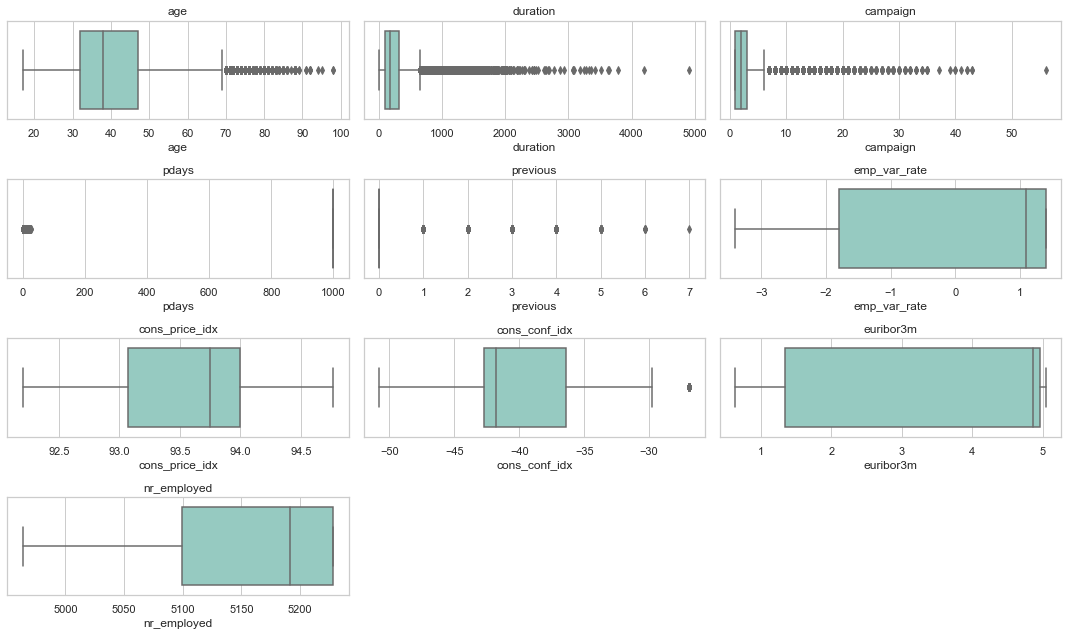

In [137]:
# Numerical Features
num_feature = [fea for fea in df_outlier2.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=feature, data=df_outlier2);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

In [138]:
# We decided to delete outlier from column age, campaign, and cons.conf.idx. 
# Column duration will be deleted because we cannot use that feature for prediction.


# Checking the outliers data
# df_outlier2[df_outlier2['age']>69.5]
# df_outlier2[df_outlier2['campaign']>50]
# df_outlier2[df_outlier2['cons_conf_idx']>-30]

In [139]:
# Deleting outlier

df_outlier2 = df_outlier2[df_outlier2['age']<=69.5]
print(df_outlier2.shape)

df_outlier2 = df_outlier2[df_outlier2['campaign']<=50]
print(df_outlier2.shape)

df_outlier2 = df_outlier2[df_outlier2['cons_conf_idx']<=-30]
print(df_outlier2.shape)

(40708, 21)
(40707, 21)
(40080, 21)


In [140]:
df_outlier2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40080 entries, 0 to 41186
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40080 non-null  int64  
 1   job             40080 non-null  object 
 2   marital         40080 non-null  object 
 3   education       40080 non-null  object 
 4   default         40080 non-null  object 
 5   housing         40080 non-null  object 
 6   loan            40080 non-null  object 
 7   contact         40080 non-null  object 
 8   month           40080 non-null  object 
 9   day_of_week     40080 non-null  object 
 10  duration        40080 non-null  int64  
 11  campaign        40080 non-null  int64  
 12  pdays           40080 non-null  int64  
 13  previous        40080 non-null  int64  
 14  poutcome        40080 non-null  object 
 15  emp_var_rate    40080 non-null  float64
 16  cons_price_idx  40080 non-null  float64
 17  cons_conf_idx   40080 non-null 

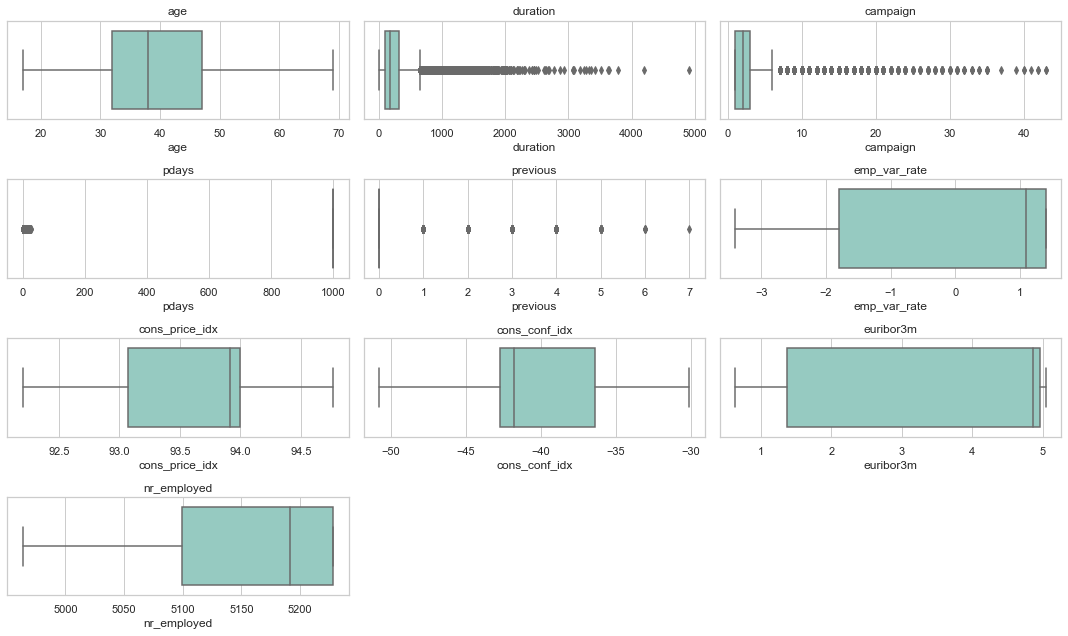

In [141]:
# Re-checking after delete the outliers
# Numerical Features
num_feature = [fea for fea in df_outlier2.describe().columns]
num_feature

plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in num_feature:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=feature, data=df_outlier2);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

In [142]:
# Lost data if we delete all outlier by IQR in (%)
(df.shape[0] - df_outlier1.shape[0])/df.shape[0]*100

17.527200310860696

In [143]:
# Lost data if we delete outlier manually in (%)
(df.shape[0] - df_outlier2.shape[0])/df.shape[0]*100

2.6617447056537786

So, we choose to delete outlier manually because we don't lost many data

In [144]:
# Use df_outlier2 as df
df = df_outlier2.copy()

In [145]:
df.shape

(40080, 21)

**Removed Unused Columns**

*Drop Duration column*

The duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

In [146]:
df.drop(columns='duration', inplace=True)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40080 entries, 0 to 41186
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40080 non-null  int64  
 1   job             40080 non-null  object 
 2   marital         40080 non-null  object 
 3   education       40080 non-null  object 
 4   default         40080 non-null  object 
 5   housing         40080 non-null  object 
 6   loan            40080 non-null  object 
 7   contact         40080 non-null  object 
 8   month           40080 non-null  object 
 9   day_of_week     40080 non-null  object 
 10  campaign        40080 non-null  int64  
 11  pdays           40080 non-null  int64  
 12  previous        40080 non-null  int64  
 13  poutcome        40080 non-null  object 
 14  emp_var_rate    40080 non-null  float64
 15  cons_price_idx  40080 non-null  float64
 16  cons_conf_idx   40080 non-null  float64
 17  euribor3m       40080 non-null 

*Drop Default Column*

Default column has 2 values, 'no' and 'yes'. Value 'no' dominate the default column with 99,9% data. So, we delete the column because it doens't give impact to the target.

In [148]:
df['default'].value_counts()/len(df['default'])*100

no     99.992515
yes    0.007485 
Name: default, dtype: float64

In [149]:
df.drop(columns='default', inplace=True)

In [150]:
df['pdays'].value_counts()

999    38780
3      359  
6      344  
4      99   
9      60   
12     56   
2      52   
7      51   
10     51   
5      42   
13     34   
11     28   
15     22   
1      22   
14     16   
0      15   
8      13   
16     9    
17     8    
18     7    
22     3    
19     3    
21     2    
25     1    
26     1    
27     1    
20     1    
Name: pdays, dtype: int64

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40080 entries, 0 to 41186
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             40080 non-null  int64  
 1   job             40080 non-null  object 
 2   marital         40080 non-null  object 
 3   education       40080 non-null  object 
 4   housing         40080 non-null  object 
 5   loan            40080 non-null  object 
 6   contact         40080 non-null  object 
 7   month           40080 non-null  object 
 8   day_of_week     40080 non-null  object 
 9   campaign        40080 non-null  int64  
 10  pdays           40080 non-null  int64  
 11  previous        40080 non-null  int64  
 12  poutcome        40080 non-null  object 
 13  emp_var_rate    40080 non-null  float64
 14  cons_price_idx  40080 non-null  float64
 15  cons_conf_idx   40080 non-null  float64
 16  euribor3m       40080 non-null  float64
 17  nr_employed     40080 non-null 

So, finally we have 18 features and 1 target

# 6 Machine Learning

## 6.1 Data Preparation

**Define X and Y**

In [152]:
df['y'].value_counts()

no     35915
yes    4165 
Name: y, dtype: int64

In [153]:
# because target still categorical, change into numerical
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0 )


In [154]:
df['y'].value_counts()/len(df['y'])*100

0    89.608283
1    10.391717
Name: y, dtype: float64

In [155]:
X = df.drop(columns=["nr_employed",'y'], axis=1)
y = df['y']

**Data Splitting**

In [156]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify = y,
    test_size = 0.2,
    random_state = 0
)

**Preprocessing**

Encode:
- One Hot Encoder:
    - Job
    - Marital
    - Education
    - Housing
    - Loan
    - Contact
    - Month
    - Day of week
    - Poutcome
- Ordinal:
    - Education

In [157]:
df['education'].value_counts()

university.degree      13498
high.school            9344 
basic.9y               5976 
professional.course    5107 
basic.4y               3886 
basic.6y               2252 
illiterate             17   
Name: education, dtype: int64

In [158]:
ordinal_mapping = [
    {'col':'education',
    'mapping':{
        'illiterate'           :    0,
        'basic.4y'             :    1, 
        'basic.6y'             :    2, 
        'basic.9y'             :    3, 
        'high.school'          :    4, 
        'professional.course'  :    5,
        'university.degree'    :    6,
    }}
]

In [159]:
df.columns

Index(['age', 'job', 'marital', 'education', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'campaign', 'pdays', 'previous', 'poutcome',
       'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
       'nr_employed', 'y'],
      dtype='object')

In [160]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['job','marital', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']),
    ('ordinal', ce.OrdinalEncoder(mapping= ordinal_mapping), ['education'])
], remainder='passthrough')

## 6.2 Base Model Evaluation

Models that we will be using for this assignment are logistic regression, knn, decision tree, random forest, Adaboost, Gradient Boost, XGBoost.

In [161]:
# Baseline model, default model
base_m_logreg = LogisticRegression(random_state = 0)
base_m_knn = KNeighborsClassifier()
base_m_dt = DecisionTreeClassifier(random_state = 0)

# boosting
# random forest
base_m_rf = RandomForestClassifier(random_state = 0)

# Adaboost
tree_ada_base = DecisionTreeClassifier(random_state = 0)
base_m_tree_ada = AdaBoostClassifier(tree_ada_base, random_state = 0)

# GradientBoost
base_m_gbc = GradientBoostingClassifier(random_state = 0)

# XGBoost
base_m_xgb = XGBClassifier(random_state = 0)

# berikut beberapa penamaan yang disiapkan untuk digunakan pada bagian selanjutnya.

# compile basic model yang sudah dibuat dalam sebuah list
base_m_compile = [base_m_logreg, base_m_knn, base_m_dt, base_m_rf, base_m_tree_ada, base_m_gbc, base_m_xgb]

# nama classfier yang disimpan secara berurutan
model_name = ["Logreg", "KNN", "DT", "RF", "AB", "GB", "XGB"]

# base model
base_m_name = ["base_m_logreg", "base_m_knn", "base_m_dt", "base_m_rf", "base_m_tree_ada", "base_m_gbc", "base_m_xgb"]

# base model + oversampling
base_m_oversamp_name = ["oversamp_base_m_logreg", "oversamp_base_m_knn", "oversamp_base_m_dt", "oversamp_base_m_rf", 
                        "oversamp_base_m_tree_ada", "oversamp_base_m_gbc", "oversamp_base_m_xgb"]

# base model + undersampling 
base_m_undersamp_name = ["undersamp_base_m_logreg", "undersamp_base_m_knn", "undersamp_base_m_dt", "undersamp_base_m_rf", "undersamp_base_m_tree_ada",
                         "undersamp_base_m_gbc", "undersamp_base_m_xgb"]

In [162]:
from sklearn.metrics import fbeta_score, make_scorer

f2_score = make_scorer(fbeta_score, beta=2)
skfold = StratifiedKFold(n_splits = 5)
cv_base_model_best_score = []
cv_colmetrics = ["base_cv.recall.mean", "base_cv.recall.std",
                "base_cv.precision.mean", "base_cv.precision.std",
                "base_cv.f2_score.mean", "base_cv.f2_score.std"]


scoring = {"recall": "recall","precision": "precision", "f2": f2_score}

for base_model in base_m_compile:

    model_pipe = Pipeline([
        ("preprocessing",transformer),
        ("resampling",RandomUnderSampler()),
        ("model", base_model)
        ])

    base_model_cv = cross_validate(model_pipe, X_train, y_train, cv = skfold, scoring = scoring, n_jobs = -1)

    cv_base_model_best_score.append([base_model_cv["test_recall"].mean(), base_model_cv["test_recall"].std(),
                             base_model_cv["test_precision"].mean(), base_model_cv["test_precision"].std(),
                             base_model_cv["test_f2"].mean(), base_model_cv["test_f2"].std()])
                            #  base_model_cv["test_accuracy"].mean(), base_model_cv["test_accuracy"].std()])

df_base_m_cv_score = (pd.DataFrame(cv_base_model_best_score, columns = cv_colmetrics, index = base_m_name) * 100).round(5)
display_side_by_side(df_base_m_cv_score, titles = ["Basic Model | Cross Validation Result"])


,base_cv.recall.mean,base_cv.recall.std,base_cv.precision.mean,base_cv.precision.std,base_cv.f2_score.mean,base_cv.f2_score.std
base_m_logreg,62.03475,1.07198,27.54269,0.77184,49.60510,0.97740
base_m_knn,64.13523,1.79724,20.82218,0.37177,45.28709,0.97317
base_m_dt,64.01610,2.80729,16.99378,0.75574,41.20453,1.75501
base_m_rf,64.73610,1.48703,25.18498,0.70840,49.24967,0.94191
base_m_tree_ada,64.34576,0.68704,20.50729,0.40181,45.07305,0.63677
base_m_gbc,62.15514,1.52817,31.92169,1.05106,52.24729,1.26155
base_m_xgb,63.80602,2.01211,24.91082,0.24223,48.61606,1.09613


**Conclusion**
- Based on the result above, we will select three best models which are Random Forest, Gradient Boost and XGBoost.

In [163]:
from sklearn.metrics import fbeta_score, make_scorer
from sklearn.preprocessing import MinMaxScaler,RobustScaler,StandardScaler

f2_score = make_scorer(fbeta_score, beta=2)
skfold = StratifiedKFold(n_splits = 5)
cv_base_model_best_score = []
cv_colmetrics = ["base_cv.recall.mean", "base_cv.recall.std",
                "base_cv.precision.mean", "base_cv.precision.std",
                "base_cv.f2_score.mean", "base_cv.f2_score.std"]


scoring = {"recall": "recall","precision": "precision", "f2": f2_score}

for base_model in base_m_compile:

    model_pipe = Pipeline([
        ("preprocessing",transformer),
        ("scaler",StandardScaler()),
        ("resampling",RandomUnderSampler()),
        ("model", base_model)
        ])

    base_model_cv = cross_validate(model_pipe, X_train, y_train, cv = skfold, scoring = scoring, n_jobs = -1)

    cv_base_model_best_score.append([base_model_cv["test_recall"].mean(), base_model_cv["test_recall"].std(),
                             base_model_cv["test_precision"].mean(), base_model_cv["test_precision"].std(),
                             base_model_cv["test_f2"].mean(), base_model_cv["test_f2"].std()])
                            #  base_model_cv["test_accuracy"].mean(), base_model_cv["test_accuracy"].std()])

df_base_m_cv_score = (pd.DataFrame(cv_base_model_best_score, columns = cv_colmetrics, index = base_m_name) * 100).round(5)
display_side_by_side(df_base_m_cv_score, titles = ["Basic Model | Cross Validation Result"])

,base_cv.recall.mean,base_cv.recall.std,base_cv.precision.mean,base_cv.precision.std,base_cv.f2_score.mean,base_cv.f2_score.std
base_m_logreg,60.26410,1.48436,31.47071,0.55554,50.93424,0.95591
base_m_knn,64.10583,1.16972,20.88916,0.66108,45.33697,0.98470
base_m_dt,63.68581,1.00108,16.87414,0.41056,40.95331,0.65935
base_m_rf,65.18709,1.84277,25.40018,0.52552,49.62440,1.00423
base_m_tree_ada,65.87661,0.58170,20.33666,0.71324,45.48777,0.83674
base_m_gbc,61.76475,1.34617,31.87773,0.91025,52.00204,1.04345
base_m_xgb,63.35575,1.14663,24.41590,0.80467,48.02691,1.04042


In [164]:
# buat list untuk menampung hasil test base model
base_model_test_score = []

# menyiapkan nama kolom untuk dataframe output hasil test
test_col_metrics_ = ["base_test_recall", "base_test_precision", "base_test_f2"]


# kita gunakan forloop untuk menghitung melakukan predict hasil test
# beberapa variabel telah disiapkan sebelumnya seperti base_m_name dan base_m_compile
for modelname, model in zip(base_m_name, base_m_compile):
    
    # mendefinsikan pipemodel
    model_pipe = Pipeline([
        ("preprocessing",transformer),
        ("resampling", RandomUnderSampler()),
        ("model", model)
        ])
    
    # training model
    model_pipe.fit(X_train, y_train)
    
    # predict class & proba
    # predict proba yang dilakukan adalah ke kelas 1. 
    y_pred_proba_ = model_pipe.predict_proba(X_test)[:,1]
    
    # predict class
    y_pred_class_ = model_pipe.predict(X_test)
    
    # hasil scoring disimpan dalam sebuah list
    base_model_test_score.append([recall_score(y_test, y_pred_class_), # recall menggunakan Y_pred_class
                                      precision_score(y_test, y_pred_class_), # precision menggunakan Y_pred_class
                                      fbeta_score(y_test, y_pred_class_, beta=2)]) # f2 score menggunakan Y_pred_class
    
    # mengeluarkan classification report default untuk melihat keseluruhan hasil yang ada
    print("--"*32)
    print(f"{modelname}")
    print("--"*32)    
    print(classification_report(y_test, y_pred_class_), "\n\n")

# hasil scoring dibuat dalam bentuk dataframe
df_base_m_test_score = (pd.DataFrame(base_model_test_score, index = base_m_name, columns = test_col_metrics_) * 100).round(5)

# print output dataframe dengan format yang baik
display_side_by_side(df_base_m_test_score, titles = ["Basic Model | Test Result"])

----------------------------------------------------------------
base_m_logreg
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.83      0.88      7183
           1       0.30      0.63      0.40       833

    accuracy                           0.81      8016
   macro avg       0.62      0.73      0.64      8016
weighted avg       0.88      0.81      0.83      8016
 


----------------------------------------------------------------
base_m_knn
----------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.72      0.82      7183
           1       0.22      0.68      0.33       833

    accuracy                           0.71      8016
   macro avg       0.58      0.70      0.57      8016
weighted avg       0.87      0.71      0.77      8016
 


-------------------------------------------------------

,base_test_recall,base_test_precision,base_test_f2
base_m_logreg,62.78511,29.53134,51.24437
base_m_knn,67.82713,21.78943,47.67932
base_m_dt,64.10564,16.80831,41.02013
base_m_rf,66.50660,26.04607,50.74189
base_m_tree_ada,65.06603,19.77381,44.62374
base_m_gbc,63.62545,32.12121,53.19149
base_m_xgb,65.54622,26.47915,50.61179


From cross validation above when we see the F2 score, the top 3 highest score from the models are Gradient Boost, XGBoost, and Random Forest with RandomUnderSampler for resampling. So, we will do the hyperparameter tuning for this 3 models.

# 7 Hyperparameter Tuning

## 7.1 Random Forest

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.

souce: [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#:~:text=A%20random%20forest%20classifier.,accuracy%20and%20control%20over%2Dfitting.)

*RANDOMIZED SEARCH RANDOM FOREST*

In [165]:
# mendefinisikan model Random Forest Classifier
model_rf = RandomForestClassifier(random_state = 0)


# transformer & skfold menggunakan yang telah didefinsikan sebelumnya

f2_score = make_scorer(fbeta_score, beta=2)


# membuat pipeline untuk Random Forest Classifier
rfpipe = Pipeline([
    ("preprocessing",transformer),
    ("resampler", RandomUnderSampler()),
    ("rf", model_rf)
    ])

# membuat hyperparameter space Random Forest Classifier
rf_param_space = {
    "rf__n_estimators" : range(1,10,1), 
    "rf__max_depth" : range(1,10,1), 
    "rf__min_samples_split" : range(2,5,1), 
    "rf__min_samples_leaf" : range(1,5,1), 
    "rf__max_features" : ["sqrt", "log2", None],
    "rf__class_weight" : ["balanced", "balanced_subsample"]
}

random_search = RandomizedSearchCV(
    estimator=rfpipe,
    param_distributions=rf_param_space,
    cv=5,
    scoring= f2_score,
    error_score='raise',
    n_jobs=-1,
    random_state=0,
    n_iter=500                 
)

In [166]:
# Training Random Search CV Random Forest Classifier
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, error_score='raise',
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['job',
                                                                                'marital',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                                                'month',
                                                                    

In [167]:
# mendapatkan best parameter & best score dari Random Search CV Random Forest Classifier
print("Best parameter : ", random_search.best_params_, "\n")
print("best score : ", random_search.best_score_)

Best parameter :  {'rf__n_estimators': 9, 'rf__min_samples_split': 2, 'rf__min_samples_leaf': 4, 'rf__max_features': None, 'rf__max_depth': 6, 'rf__class_weight': 'balanced_subsample'} 

best score :  0.5234407428128696


In [168]:
# best parameter untuk Random Search CV Random Forest Classifier hyperparameter tuning dalam bentuk dataframe
rf_best_param_0_8_train = pd.DataFrame(random_search.best_params_, index = [0]).T
rf_best_param_0_8_train.rename(columns = {0 : "parameter_value"}, inplace = True)
display_side_by_side(rf_best_param_0_8_train, titles = ["RF_Bestparameter - HT - all features"])

,parameter_value
rf__n_estimators,9
rf__min_samples_split,2
rf__min_samples_leaf,4
rf__max_features,None
rf__max_depth,6
rf__class_weight,balanced_subsample


In [169]:
# model default sebelum hyperparameter tuning
rfpipe

# mendapatkan model Random Forest Classifier dari Random Search CV 
rf_best_model = random_search.best_estimator_

# melihat kelas yang ada
rf_best_model.classes_

array([0, 1], dtype=int64)

In [170]:
# training model default 
rfpipe.fit(X_train, y_train)

# training model setelah HT
rf_best_model.fit(X_train, y_train)

# mendapatkan hasil prediksi rf default
y_pred_class_rf_default = rfpipe.predict(X_test)
y_pred_proba_rf_default = rfpipe.predict_proba(X_test)

# mendapatkan hasil prediksi rf tuned
y_pred_class_rf_tuned = rf_best_model.predict(X_test)
y_pred_proba_rf_tuned = rf_best_model.predict_proba(X_test)

# print hasilnya f2_score rf
print("f2_score RF default : ", fbeta_score(y_test, y_pred_class_rf_default, beta=2))
print("f2_score RF tuned : ",fbeta_score(y_test, y_pred_class_rf_tuned, beta=2), "\n")

f2_score_rf_default = fbeta_score(y_test, y_pred_class_rf_default, beta=2)
f2_score_rf_tuned = fbeta_score(y_test, y_pred_class_rf_tuned, beta=2)

f2_score RF default :  0.507044864664442
f2_score RF tuned :  0.5331503378378379 



## 7.2 Gradient Boost

At a high level, the way GBMs work is by starting with a rough prediction and then building a series of decision trees, with each tree in the series trying to correct the prediction error of the tree before it. There's more detailed descriptions of the mechanics behind the algorithm out there, but this series of posts is intended to give more of an intuitive understanding of what the algorithm does.

Source: [here](https://www.analyticsvidhya.com/blog/2016/02/complete-guide-parameter-tuning-gradient-boosting-gbm-python/)

In [171]:
# mendefinisikan model GradientBoost
model_gb = GradientBoostingClassifier(random_state = 0)

# metode oversample bisa menggunakan pada bagian Hyperparameter Tuning dari Logreg, tidak saya definsikan ulang

# transformer & skfold menggunakan yang telah didefinsikan sebelumnya

f2_score = make_scorer(fbeta_score, beta=2)

# membuat pipeline
gb_pipe = Pipeline([
    ("resampler", RandomUnderSampler()),
    ("preprocessing",transformer),
    ("gb", model_gb)
    ])

# membuat hyperparameter space, ingat parameter default harus ada di paramspace
gb_param_space = {
    "gb__learning_rate" : [0.01, 0.05, 0.1, 0.2],
    "gb__n_estimators" : range(1,20,1),  
    "gb__subsample" : [0.8, 0.9, 1],
    "gb__max_depth" : range(1,20,1),
    "gb__max_features" : range(1,10,2)
}

# membuat random search CV
gb_random_search = RandomizedSearchCV(
    estimator=gb_pipe,
    param_distributions=gb_param_space,
    cv=5,
    scoring=f2_score,
    n_jobs=-1,
    random_state=0,
    n_iter=50               
)

In [172]:
# Training Random Search CV Gradient Boost
gb_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('resampler',
                                              RandomUnderSampler()),
                                             ('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['job',
                                                                                'marital',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                                  

In [173]:
# mendapatkan best parameter dan best score untuk XGBoost Random search
print("Best parameter : ",gb_random_search.best_params_, "\n")
print("best score : ", gb_random_search.best_score_)

Best parameter :  {'gb__subsample': 1, 'gb__n_estimators': 12, 'gb__max_features': 7, 'gb__max_depth': 5, 'gb__learning_rate': 0.2} 

best score :  0.5215900056082756


In [174]:
# best parameter untuk RandomizedSearch CV GBoost hyperparameter tuning dalam sebuah dataframe
gb_best_param_0_8_train = pd.DataFrame(gb_random_search.best_params_, index = [0]).T
gb_best_param_0_8_train.rename(columns = {0 : "parameter_value"}, inplace = True)
display_side_by_side(gb_best_param_0_8_train, titles = ["GB_Bestparameter - HT - all features"])

,parameter_value
gb__subsample,1.0
gb__n_estimators,12.0
gb__max_features,7.0
gb__max_depth,5.0
gb__learning_rate,0.2


In [175]:
# model default sebelum hyperparameter tuning
gb_pipe

# mendapatkan model XGBoost dengan parameter terbaik
gb_best_model = gb_random_search.best_estimator_

# melihat kelas yang ada
gb_best_model.classes_

array([0, 1], dtype=int64)

In [176]:
# training model default 
gb_pipe.fit(X_train, y_train)

# training xgb tuned 
gb_best_model.fit(X_train, y_train)

# mendapatkan hasil prediksi XGBoost default
y_pred_class_gb_default = gb_pipe.predict(X_test)
y_pred_proba_gb_default = gb_pipe.predict_proba(X_test)

# mendapatkan hasil prediksi XGboost tuned
y_pred_class_gb_tuned = gb_best_model.predict(X_test)
y_pred_proba_gb_tuned = gb_best_model.predict_proba(X_test)

# keluarkan f2_score untuk XGBoost Default dan Tuned
print("f2_score GB default : ", fbeta_score(y_test, y_pred_class_gb_default, beta=2))
print("f2_score GB tuned : ", fbeta_score(y_test, y_pred_class_gb_tuned, beta=2), "\n")

f2_score_gb_default = fbeta_score(y_test, y_pred_class_gb_default, beta=2)
f2_score_gb_tuned = fbeta_score(y_test, y_pred_class_gb_tuned, beta=2)

f2_score GB default :  0.5285047677013592
f2_score GB tuned :  0.5267929089443997 



## 7.3 XGBoost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples

source: [here](https://xgboost.readthedocs.io/en/stable/)

In [177]:
# mendefinisikan model XGBoost
model_XGBoost = XGBClassifier()

# metode resamplingnya
rus = RandomUnderSampler(random_state = 0)

f2_score = make_scorer(fbeta_score, beta=2)

# membuat pipeline untuk XGBoost Classifier
XGBoostpipe = Pipeline([
    ("undersampling", rus),
    ("preprocessing",transformer),
    ("model", model_XGBoost)
    ])

# membuat hyperparameter space XGBoost Classifier
XGBoost_param_space = {
    # 'model__booster' : ['gbtree','gblinear','dart'], 
    'model__nthread' : range(1,20,1), 
    'model__max_depth' : range(1,10,1), 
    'model__min_child_weight' : range(1,40,1), 
    'model__sampling_method' : ['uniform', 'gradient_based'], 
    'model__tree_method' : ['auto', 'exact','approx','hist','gpu_hist']
}

xgb_random_search = RandomizedSearchCV(
    estimator=XGBoostpipe,
    param_distributions=XGBoost_param_space,
    cv=5,
    scoring=f2_score,
    n_jobs=-1,
    random_state=0,
    n_iter=50               
)

In [178]:
# Training RandomizedSearch CV XGBoost
xgb_random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('undersampling',
                                              RandomUnderSampler(random_state=0)),
                                             ('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['job',
                                                                                'marital',
                                                                                'housing',
                                                                                'loan',
                                                                                'contact',
                                

In [179]:
# mendapatkan best parameter dan best score untuk XGBoost Random search
print("Best parameter : ",xgb_random_search.best_params_, "\n")
print("best score : ", xgb_random_search.best_score_)

Best parameter :  {'model__tree_method': 'approx', 'model__sampling_method': 'uniform', 'model__nthread': 3, 'model__min_child_weight': 27, 'model__max_depth': 2} 

best score :  0.5217486324656406


In [180]:
xgb_random_search.best_estimator_

Pipeline(steps=[('undersampling', RandomUnderSampler(random_state=0)),
                ('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'day_of_week', 'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'education',
                                                                           'mapping': {'basic.4y': 1,
                                                                                       'basic.6y': 2,...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                  

In [181]:
# best parameter untuk RandomizedSearch CV XGBoost hyperparameter tuning dalam sebuah dataframe
xgb_best_param_0_8_train = pd.DataFrame(xgb_random_search.best_params_, index = [0]).T
xgb_best_param_0_8_train.rename(columns = {0 : "parameter_value"}, inplace = True)
display_side_by_side(xgb_best_param_0_8_train, titles = ["XGB_Bestparameter - HT - all features"])

,parameter_value
model__tree_method,approx
model__sampling_method,uniform
model__nthread,3
model__min_child_weight,27
model__max_depth,2


In [182]:
# model default sebelum hyperparameter tuning
XGBoostpipe

# mendapatkan model XGBoost dengan parameter terbaik
xgb_best_model = xgb_random_search.best_estimator_

# melihat kelas yang ada
xgb_best_model.classes_

array([0, 1], dtype=int64)

In [183]:
# training model default 
XGBoostpipe.fit(X_train, y_train)

# training xgb tuned 
xgb_best_model.fit(X_train, y_train)

# mendapatkan hasil prediksi XGBoost default
y_pred_class_xgb_default = XGBoostpipe.predict(X_test)
y_pred_proba_xgb_default = XGBoostpipe.predict_proba(X_test)

# mendapatkan hasil prediksi XGboost tuned
y_pred_class_xgb_tuned = xgb_best_model.predict(X_test)
y_pred_proba_xgb_tuned = xgb_best_model.predict_proba(X_test)

# keluarkan f2_score untuk XGBoost Default dan Tuned
print("f2_score XGB default : ", fbeta_score(y_test, y_pred_class_xgb_default, beta=2))
print("f2_score XGB tuned : ", fbeta_score(y_test, y_pred_class_xgb_tuned, beta=2), "\n")

f2_score_xgb_default = fbeta_score(y_test, y_pred_class_xgb_default, beta=2)
f2_score_xgb_tuned = fbeta_score(y_test, y_pred_class_xgb_tuned, beta=2)


f2_score XGB default :  0.506641366223909
f2_score XGB tuned :  0.5326460481099656 



In [184]:
score_list = [f2_score_rf_default, f2_score_rf_tuned, f2_score_gb_default, f2_score_gb_tuned, f2_score_xgb_default, f2_score_xgb_tuned]

models = ['RF_default', 'RF_tuned','GBoost_default', 'GBoost_tuned','XGBoost_default', 'XGBoost_tuned']

score = pd.DataFrame({
    'Model': models,
    'F2 score': score_list
})

score

,Model,F2 score
0,RF_default,0.507045
1,RF_tuned,0.533150
2,GBoost_default,0.528505
3,GBoost_tuned,0.526793
4,XGBoost_default,0.506641
5,XGBoost_tuned,0.532646


Based on the score above, Gradient Boost and XGBoost do not have much different in score, we decided to choose XGBoost in the next process.  

# 8 Feature Importance

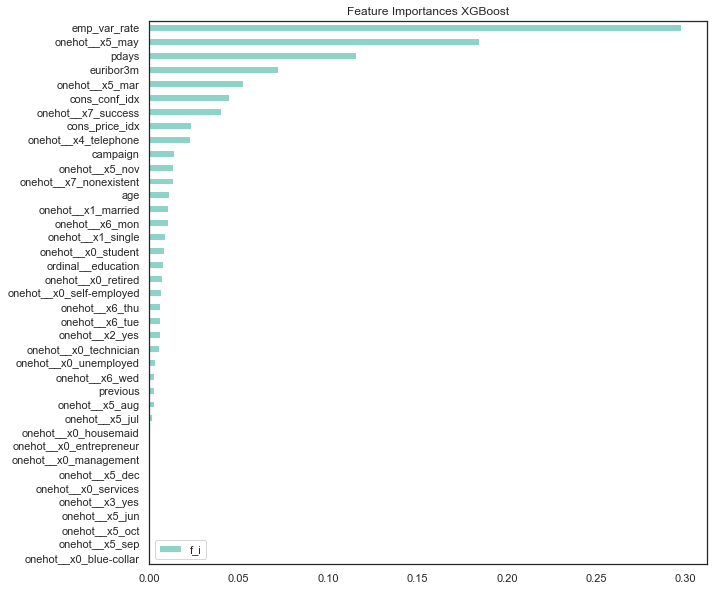

In [185]:
# mendapatkan feature names
feature_names = xgb_best_model[1].get_feature_names()

# feature importances
f_i_data = xgb_best_model[2].feature_importances_

# dibuat dalam bentuk dataframe
df__f_i = pd.DataFrame(data = f_i_data, index = feature_names, columns = ["f_i"]).sort_values(by = ["f_i"], ascending = True)

# kita plotkan hasilnya
sns.set_style("white")
df__f_i.plot(kind = "barh", figsize = (10,10), title = "Feature Importances XGBoost")
plt.show()

**Feature Importance XGBoost**

From feature importance graph above we choose these features:

nr_employedn, cons_conf_idx, pdays, emp_var_rate, poutcome, cons_price_idx, euribor3m, contact

**Shapley Value of Explanations (SHAP)**

We want to see another method to see features importance. SHAP uses to interpret the explainable machine learning (example: XGBoost) and shows us the feature importance. <br>
For each feature, SHAP value explains the contribution to explain the difference between the average model prediction and the actual prediction of the instance. Source: [here](https://towardsdatascience.com/shap-a-reliable-way-to-analyze-your-model-interpretability-874294d30af6)

In [186]:
features = list(transformer.get_feature_names())
features

['onehot__x0_blue-collar',
 'onehot__x0_entrepreneur',
 'onehot__x0_housemaid',
 'onehot__x0_management',
 'onehot__x0_retired',
 'onehot__x0_self-employed',
 'onehot__x0_services',
 'onehot__x0_student',
 'onehot__x0_technician',
 'onehot__x0_unemployed',
 'onehot__x1_married',
 'onehot__x1_single',
 'onehot__x2_yes',
 'onehot__x3_yes',
 'onehot__x4_telephone',
 'onehot__x5_aug',
 'onehot__x5_dec',
 'onehot__x5_jul',
 'onehot__x5_jun',
 'onehot__x5_mar',
 'onehot__x5_may',
 'onehot__x5_nov',
 'onehot__x5_oct',
 'onehot__x5_sep',
 'onehot__x6_mon',
 'onehot__x6_thu',
 'onehot__x6_tue',
 'onehot__x6_wed',
 'onehot__x7_nonexistent',
 'onehot__x7_success',
 'ordinal__education',
 'age',
 'campaign',
 'pdays',
 'previous',
 'emp_var_rate',
 'cons_price_idx',
 'cons_conf_idx',
 'euribor3m']

In [187]:
xgb_best_model

Pipeline(steps=[('undersampling', RandomUnderSampler(random_state=0)),
                ('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(drop='first'),
                                                  ['job', 'marital', 'housing',
                                                   'loan', 'contact', 'month',
                                                   'day_of_week', 'poutcome']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'education',
                                                                           'mapping': {'basic.4y': 1,
                                                                                       'basic.6y': 2,...
                               gamma=0, gpu_id=-1, grow_policy='depthwise',
                  

In [188]:
models = xgb_best_model['model']
models

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=2, max_leaves=0, min_child_weight=27,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=3, nthread=3, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, ...)

In [189]:
X_train_trans = xgb_best_model['preprocessing'].transform(X_train)
X_train_trans

array([[  0.   ,   0.   ,   0.   , ...,  92.963, -40.8  ,   1.262],
       [  0.   ,   0.   ,   0.   , ...,  94.465, -41.8  ,   4.961],
       [  0.   ,   0.   ,   0.   , ...,  93.075, -47.1  ,   1.41 ],
       ...,
       [  0.   ,   0.   ,   0.   , ...,  94.465, -41.8  ,   4.961],
       [  1.   ,   0.   ,   0.   , ...,  92.893, -46.2  ,   1.313],
       [  0.   ,   0.   ,   0.   , ...,  93.994, -36.4  ,   4.857]])

 97%|=================== | 31130/32064 [00:22<00:00]       

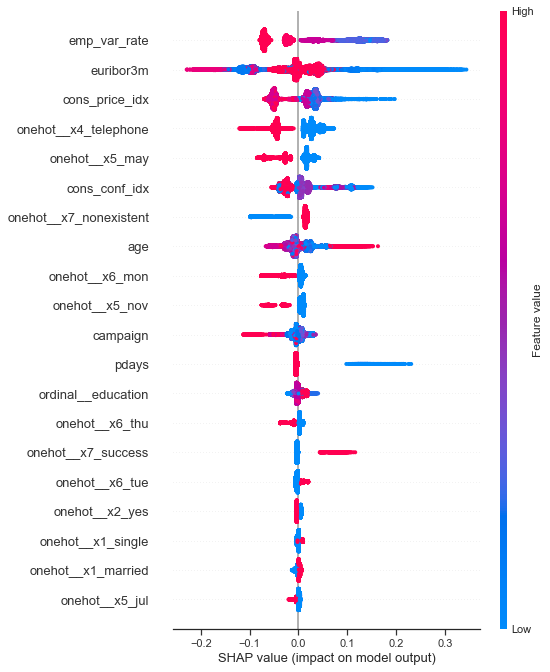

In [190]:
shap_values = shap.TreeExplainer(models,
                                 data = X_train_trans,
                                 feature_dependence="independent",
                                 model_output="probability").shap_values(X_train_trans)
                                 
shap.summary_plot(shap_values, X_train_trans,feature_names = features)

**Brief Interpretation**
- emp_var_rate feature in this SHAP value shows negatively correlated with target. The lower the value in emp_var_rate, the higher tendency for a customer to subscribe. Here also shows that the tendency to subscribe is higher than not subscibe.

## 8.1 Best Model with Current Feature

In [191]:
# kembali buat pipeline dengan best model yang telah di tuning pada tahap sebelumnya.
# parameter oversampling dan transformer tidak ada yang berubah. bisa kita gunakan kembali.
xgb_pipe_f = Pipeline([
    ("undersampling", rus),
    ("preprocessing",transformer),
    ("xgb_best_model", xgb_best_model[2])
    ])

In [192]:
# kita kembali training datanya.
xgb_pipe_f.fit(X_train, y_train)

# kita keluarkan kelas prediksinya
y_pred_class_final = xgb_pipe_f.predict(X_test)

# keluarkan classification reportnya untuk nanti dibandingkan dengan yang telah difeature selection.
print("XGBoost Tuned Final model : XGboost Classifier with best parameter")
print("--"*32,"\nXGBoost Tuned Final model - No Feature Selection\n","--"*32, "\n", fbeta_score(y_test, y_pred_class_final, beta=2))

XGBoost Tuned Final model : XGboost Classifier with best parameter
---------------------------------------------------------------- 
XGBoost Tuned Final model - No Feature Selection
 ---------------------------------------------------------------- 
 0.5326460481099656


## 8.2 Best Model with Selected Feature

In [193]:
# Menyiapkan data X dan Y. X hanya feature terpilih saja.
# Y sama. tapi kita beri nama variabel yang berbeda saja agar seragam dengan X nya.
X_fs = df[["nr_employed", "cons_conf_idx", "pdays", "emp_var_rate", "poutcome", "cons_price_idx", "euribor3m", "contact"]]
y_fs = df["y"]

In [194]:
# Split data untuk data training dan testing
# parameter trantestsplit adalah sama dengan yang dilakukan pada data dengan full feature
X_fs_train, X_fs_test, y_fs_train, y_fs_test = train_test_split(X_fs, y_fs, test_size = 0.2, stratify = y, random_state = 0)

In [195]:
X_fs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40080 entries, 0 to 41186
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nr_employed     40080 non-null  float64
 1   cons_conf_idx   40080 non-null  float64
 2   pdays           40080 non-null  int64  
 3   emp_var_rate    40080 non-null  float64
 4   poutcome        40080 non-null  object 
 5   cons_price_idx  40080 non-null  float64
 6   euribor3m       40080 non-null  float64
 7   contact         40080 non-null  object 
dtypes: float64(5), int64(1), object(2)
memory usage: 2.8+ MB


In [196]:
# disini saya kembali definisikan modelnya
model_xgb_fs = XGBClassifier()

# metode resampling
rus = RandomUnderSampler(random_state = 0)

# transformer perlu kita definsikan ulang karena jumlah feature yang berbeda. kita definisikan kembali dibawah ini. 
transformer_fs = ColumnTransformer([
    ("ohe_fs", OneHotEncoder(drop = "first"), ["poutcome", "contact"])]
    , remainder = "passthrough")

# membuat pipeline
xgb_pipe_fs = Pipeline([
    ("undersampling_fs_dep", rus),
    ("preprocessing_fs_dep",transformer_fs),
    ("model", model_xgb_fs)
    ])

# membuat hyperparameter space
xgboost_param_space_fs = {
    'model__nthread' : range(1,20,1), 
    'model__max_depth' : range(1,10,1), 
    'model__min_child_weight' : range(1,40,1), 
    'model__sampling_method' : ['uniform', 'gradient_based'], 
    'model__tree_method' : ['auto', 'exact','approx','hist','gpu_hist']
}

xgb_random_search_fs = RandomizedSearchCV(
    estimator=xgb_pipe_fs,
    param_distributions=xgboost_param_space_fs,
    cv=5,
    scoring=f2_score,
    n_jobs=-1,
    random_state=0,
    n_iter=50               
)

In [197]:
# Training RandomizedSearch CV XGBoost
xgb_random_search_fs.fit(X_fs_train, y_fs_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('undersampling_fs_dep',
                                              RandomUnderSampler(random_state=0)),
                                             ('preprocessing_fs_dep',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe_fs',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['poutcome',
                                                                                'contact'])])),
                                             ('model',
                                              XGBClassifier(base_score=None,
                                                            booster=None,
                                                            callbacks=No

In [198]:
xgb_random_search_fs.best_score_

0.5216935084755857

In [199]:
xgb_random_search_fs.best_estimator_

Pipeline(steps=[('undersampling_fs_dep', RandomUnderSampler(random_state=0)),
                ('preprocessing_fs_dep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_fs',
                                                  OneHotEncoder(drop='first'),
                                                  ['poutcome', 'contact'])])),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, e...
                               gamma=0, gpu_id=0, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=7, max_leaves=0, min_child_wei

In [200]:
# kita keluarkan kelas prediksinya
y_pred_class_final_fs = xgb_random_search_fs.best_estimator_.predict(X_fs_test)

## 8.3 Recap For Feature Importance and Feature Selection

In [201]:
# print default classification report to validate custom dataframe class.report
print("\n\nDefault classification report to validate dataframe above")
print("--"*32)
print("XGB Tuned Final model - No Feature Selection")
print("--"*32)
print(fbeta_score(y_test, y_pred_class_final, beta=2), "\n\n")

print("--"*32)
print("XGB Tuned Final model - With Feature Selection")
print("--"*32)
print(fbeta_score(y_fs_test, y_pred_class_final_fs, beta=2))



Default classification report to validate dataframe above
----------------------------------------------------------------
XGB Tuned Final model - No Feature Selection
----------------------------------------------------------------
0.5326460481099656 


----------------------------------------------------------------
XGB Tuned Final model - With Feature Selection
----------------------------------------------------------------
0.5295791827607236


Eventhough the score for model after feature selection is actually lower compared to model before feature selection, we will use the model with feature selection as the difference is not much and also will give efficiency in time and money related with computer processess.

**Confusion Matrix**

After we make final model with feature selection, we should know the confusion matrix to know the prediction value and actual value after we use machine learning.

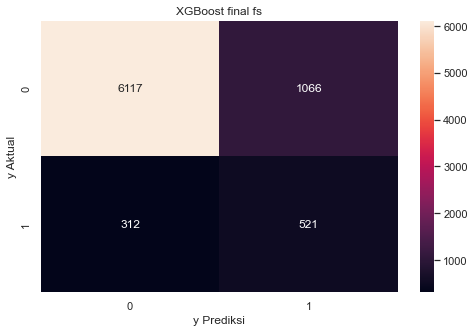

In [202]:
# Model XGBoost Final

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_fs_test, y_pred_class_final_fs), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('XGBoost final fs');

**Search for best threshold**

We want to try to search for the best threshold with looping. If we know what is the best threshold value. We assume that we can improve the metric score (F2 score).

In [203]:
xgb_pipe_f_fs = Pipeline([
    ("preprocessing_fs",transformer_fs),
    ("undersampling_fs", rus),
    ("xgb_best_model", xgb_best_model[2])
    ])

In [204]:
model_th = xgb_pipe_f_fs 
model_th.fit(X_fs_train, y_fs_train)

th_value = [i/100 for i in range(1,100)]
score_list = []

score = 0

# looping
for i in th_value:

    # predict
    y_pred_proba = model_th.predict_proba(X_fs_test)[:, 1]
    y_pred = np.where(y_pred_proba > i, 1, 0) 

    score_temp = fbeta_score(y_fs_test, y_pred, beta=2)
    score_list.append(score_temp)

    # melihat score dan threshold terbaik
    if score_temp > score:
        score = score_temp

        best_score = score
        best_th = i

''

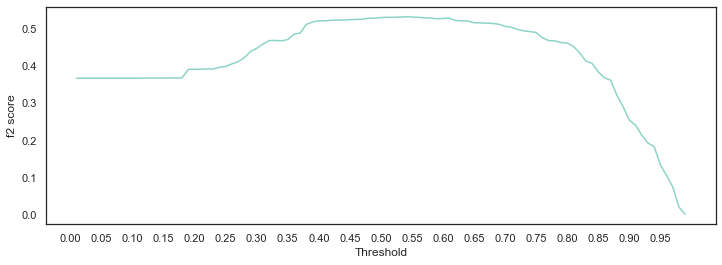

In [205]:
plt.figure(figsize=(12,4))
sns.lineplot(x=th_value, y=score_list)
plt.xticks([i/100 for i in range(0,100,5)])

plt.xlabel('Threshold')
plt.ylabel('f2 score');
;

In [206]:
print('Best f2 score:  ', best_score)
print('Best threshold: ', best_th)


Best f2 score:   0.5327783558792923
Best threshold:  0.54


In [207]:
model_th = xgb_pipe_f_fs 
model_th.fit(X_fs_train, y_fs_train)
    # predict
y_pred_proba = model_th.predict_proba(X_fs_test)[:, 1]
y_pred_th = np.where(y_pred_proba > 0.51, 1, 0)

score_temp = fbeta_score(y_fs_test, y_pred, beta=2)


In [208]:
y_pred_proba

array([0.8314682 , 0.11779405, 0.81989616, ..., 0.31484428, 0.25407672,
       0.18901145], dtype=float32)

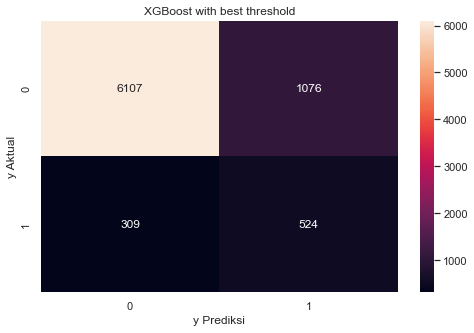

In [209]:
# Model XGBoost with best threshold

f, ax = plt.subplots(figsize=(8, 5))
sns.heatmap(confusion_matrix(y_fs_test, y_pred_th), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('XGBoost with best threshold');

Best threshold is 0.51 so, with reduction in False Positif (2 customer). We see that it is no difference from default threshold that is 0.50.

# 9 Conclusion & Recommendation

**Result Observations of Dataset**

* Most customers are working as administrators, blue-collars, and technicians. However, students are more likely to subscribe the term deposit compared to other jobs.
* Most customers have bachelor degree. It shows that people with university degree are more aware of a bank product, such as term deposit.
* Most customers have neither default on their record nor personal loan.
* Bank mostly make a contact to customer by cellular.


**MODEL**

**Conclusion**

*   The metric that we used is F2 score because we make a Recall value more important than a Precision one. In other words, it focuses on minimizing False Negatives than minimizing False Positives. The best F2 score is 0.532.

*   If we call all of our customer without machine learning, assume that we contact 8016 customer (20% from our data) and we just have 2 results, False Positive and True Positive. So, the total error cost that we lost if we call all the customer:  
    *   False Positive = 7110 customers (88,8% from data test)
    *   True Positive = 906 customers (11,2% from data test)
    *   Total cost due to false positive (customer that we call but didn't subscribe) => 7110 x 500 EURO = 3555000 EURO
    *   Total Customer that have potentian to subcribe but didn't subscribe => 0 customer (because we call all of the customer)

So, if we don't use machine learning and we call all of our customers, the total error cost is 3555000 EURO

*   If we use machine learning, we know how many customer that is predicted subscribe and actually not subscribe (False Positif) and customer who are predicted not subscribe and actually subscribe (False Negative). So, the total cost from our error:
    *   False Positive = 1065 customers 
    *   False Negative = 309 customers
    *   Error cost => (1065 x 500) + (309 x 2000) = 1151500 EURO

*   So, we can reduce the error cost: 
    *   Reduce error cost => 3555000 EURO (without machine learning) - 1151500 EURO (with machine learning) = 2403500 EURO or around 67.6%

  
**Recommendation**

*   All the processes in here including business understanding, data cleaning, EDA, ML modeling, hyperparam tuning etc. already followed common practice in ML implementation.
Unfortunately, the score result is not considered good. Therefore, if there are more data in the future we hope that the score will also be improved.
*   Our data is highly imbalance, so it is better to gather more data to reduce the imbalace data.
*   Add more features that likely have correlation to the target to improve the metrics score.
*   Try to use another machine learning algorithm and hyperparameter tuning again.











# 10 Deployment

*MACHINE LEARNING MODELING*

- The data that we have is split data (80% data training and 20% data test), so we can train the data and validate the result.
- In resampling process (Encoding) and model is in pipeline to prevent the data leakage.
- After validate the model with cross validation and the result is good, we will go to deployment.

*DEPLOYMENT*

For deployment, we will not split the data. So, the data can learn more with full data and make a good result.


**Data Preparation**

In [210]:
# df["y"]

In [211]:
len(df)

40080

In [212]:
# df.sample(5)

In [213]:
df_ran = df.sample(len(df))
df_ran

# The data must be save randomly, if it is not, we will get very low F2 score.

,age,job,marital,education,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
5764,35,admin.,married,high.school,no,yes,telephone,may,mon,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
39404,35,admin.,divorced,high.school,yes,yes,telephone,apr,thu,1,999,0,nonexistent,-1.8,93.749,-34.6,0.635,5008.7,1
25084,35,blue-collar,divorced,basic.9y,yes,no,cellular,nov,tue,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
23671,39,technician,divorced,professional.course,yes,no,cellular,aug,thu,17,999,0,nonexistent,1.4,93.444,-36.1,4.962,5228.1,0
33709,41,blue-collar,married,basic.9y,no,no,cellular,may,wed,1,999,0,nonexistent,-1.8,92.893,-46.2,1.281,5099.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24789,34,blue-collar,married,professional.course,no,no,cellular,nov,tue,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8,0
19194,53,admin.,married,university.degree,no,no,cellular,aug,wed,5,999,0,nonexistent,1.4,93.444,-36.1,4.967,5228.1,0
20155,34,technician,single,professional.course,yes,no,cellular,aug,mon,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
25064,46,management,married,high.school,yes,yes,cellular,nov,tue,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0


In [214]:
X_train_dep = df_ran[["nr_employed", "cons_conf_idx", "pdays", "emp_var_rate", "poutcome", "cons_price_idx", "euribor3m", "contact"]]
y_train_dep = df_ran["y"]

In [215]:
model_xgb_dep = xgb_random_search_fs.best_estimator_

f2_score = make_scorer(fbeta_score, beta=2)

model_cv = cross_val_score(
    estimator = model_xgb_dep,
    X = X_train_dep,
    y = y_train_dep,
    scoring = f2_score,
    cv =5,
    n_jobs=-1
)

print(model_xgb_dep)
print('cross val score', model_cv)
print('avg:', model_cv.mean())
print('std:', model_cv.std())
print()

Pipeline(steps=[('undersampling_fs_dep', RandomUnderSampler(random_state=0)),
                ('preprocessing_fs_dep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe_fs',
                                                  OneHotEncoder(drop='first'),
                                                  ['poutcome', 'contact'])])),
                ('model',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, e...
                               gamma=0, gpu_id=0, grow_policy='depthwise',
                               importance_type=None, interaction_constraints='',
                               learning_rate=0.300000012, max_bin=256,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=7, max_leaves=0, min_child_wei

F2 score with all data = 0.524

**SAVE MODEL**

In [216]:
# penamaan file pickle
filename = "Telemarketing_model.sav"

# export .sav sebagai file
pickle.dump(model_xgb_dep, open(filename, "wb"))

**LOAD MODEL**

In [217]:
# nama file pickle
filename = "Telemarketing_model.sav"

# perintah untuk load model
loaded_model = pickle.load(open(filename, "rb"))

In [218]:
X_train_dep = df_ran[["nr_employed", "cons_conf_idx", "pdays", "emp_var_rate", "poutcome", "cons_price_idx", "euribor3m", "contact"]]

In [219]:
X_train_dep

,nr_employed,cons_conf_idx,pdays,emp_var_rate,poutcome,cons_price_idx,euribor3m,contact
5764,5191.0,-36.4,999,1.1,nonexistent,93.994,4.857,telephone
39404,5008.7,-34.6,999,-1.8,nonexistent,93.749,0.635,telephone
25084,5195.8,-42.0,999,-0.1,nonexistent,93.200,4.153,cellular
23671,5228.1,-36.1,999,1.4,nonexistent,93.444,4.962,cellular
33709,5099.1,-46.2,999,-1.8,nonexistent,92.893,1.281,cellular
...,...,...,...,...,...,...,...,...
24789,5195.8,-42.0,999,-0.1,failure,93.200,4.153,cellular
19194,5228.1,-36.1,999,1.4,nonexistent,93.444,4.967,cellular
20155,5228.1,-36.1,999,1.4,nonexistent,93.444,4.965,cellular
25064,5195.8,-42.0,999,-0.1,nonexistent,93.200,4.153,cellular


**PREDICT MODEL**

In [220]:
# create 1 dummy data to predict
df_1_test = pd.DataFrame({
    "nr_employed" : [5228.1],
    "cons_conf_idx" : [-36.1],
    "pdays" : [999],
    "emp_var_rate": [-1.8],
    "poutcome": ['nonexistent'],
    "cons_price_idx": [93.994],
    "euribor3m": [4.860],
    "contact": ['telephone']
    })


# print sample data
display_side_by_side(df_1_test, titles = ["Dummy Customer Data"])

# predict that data
print("predict proba :",loaded_model.predict_proba(df_1_test))
print("predict class :",loaded_model.predict(df_1_test))

,nr_employed,cons_conf_idx,pdays,emp_var_rate,poutcome,cons_price_idx,euribor3m,contact
0,5228.1,-36.1,999,-1.8,nonexistent,93.994,4.86,telephone


predict proba : [[0.2402913 0.7597087]]
predict class : [1]


Based on Dummy Customer data, there is 56% probability that this customer not subscribe.